# CM3070 - Final Project - July 2023

# Final Notebook (LSTM and Multioutput model)




1. Introduction
2. Prototype Design
3. Import Data
4. Data-preprocessing
5. Baseline Models
6. LSTM
7. LSTM Multi-variate Analysis

## 1.0 Introduction


The objective of this study is to answer the hypothesis to develop a deep learning (DL) model to effectively generalize from a metrological dataset to make medium timescale multi-output forecast predictions.  

Prototypes are first presented before extending to the final models. Detailed evaluation is located in the main report.

## 2.0 Prototype Objective

The prototype will address 3 main components:

1. Perform Exploratory Data Analysis on the selected dataset to confirm suitability
2. Set up a basic LSTM model
3. Set up a basic multivariable LSTM model

Evaluation will be through the successful implementation and the learnings for future development.


## 3.0 Import Dataset

### 3.1 Import Programming Libraries

In [1]:

# Data Manipulation Functions
import pandas as pd
# Plotting Functions
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
# Numerical Functions to Process Arrays
import numpy as np
# Statistical Functions
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
# Regression Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Machine Learning
import tensorflow as tf
from tensorflow import keras
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, LSTM
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

from keras.callbacks import CSVLogger, EarlyStopping
from keras.layers import *
from keras.models import Sequential

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import gc
import sys

# Evaluation Metrics
from sklearn import metrics

# Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



The selected dataset is the Jena Climate database. This contains measured climate data from the Max Planck Institute for Biochemistry in Jena, Germany.

The dataset consists of 14 features, including the air temperature and humidity. Measurements are taken once per 10 minutes.

The dataset spans from January 2009 to December 2016.

**To be expanded in final Report**

In [1]:
# Upload raw data from .csv file to co-lab
from google.colab import files
uploaded = files.upload()

Saving jena_climate_2009_2016.csv to jena_climate_2009_2016.csv


In [3]:
# Import the data to np array

import os
# specify file name
file = open('jena_climate_2009_2016.csv')
#read file into memory
data= file.read()
#close the file
file.close()

# separate the data points
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [4]:
# Read the data in to co-lab
import io
df_raw = pd.read_csv(io.BytesIO(uploaded['jena_climate_2009_2016.csv']))

In [5]:
# Review first few 5 rows of data
print('Checking Dataframe:')
print('---------------------')
df_raw.head()

Checking Dataframe:
---------------------


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


This extract of the imported data demonstrates that the raw .csv file was successfully imported. The first 5 rows are shown. There are 15 columns including 14 features of numerical datatype.

## 4.0 Data Pre-processing


Real data, such as this is not always consistent and it is important to correct missing, duplicate or incorrect values.


In [ ]:
# Confirm the columns (features) present and the non-null values
print('Dataframe Information:')
print('----------------------')
df_raw.info()

Dataframe Information:
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage:

Each row corresponds to a single measurement time and there are 420,551 measurements in the dataset. It can be seen that some columns contain no non-null values.

### 4.1 Remove Duplicate Values

In [ ]:
# Count any duplicate values
print('Duplicate values:')
print('-----------------')
df_raw.duplicated().sum()

Duplicate values:
-----------------


327

There are 327 duplicated records in the dataset. The total number of duplicates (327) is insignificant compared to the total number of datapoints (>420,000). These will be removed from the dataset.

In [ ]:
# Drop duplicate rows based on identical columns
df = df_raw.drop_duplicates()

## Statisitcal Analysis

In [ ]:
# Display some basic statisics on the dataset
print('Dataframe Statistics:')
print('---------------------')
df.describe()

Dataframe Statistics:
---------------------


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000,420224.000000
mean,989.214157,9.442421,283.484880,4.953472,76.028738,13.568642,9.532333,4.036225,6.021503,9.638778,1216.097805,1.700930,3.054884,174.748064
std,8.360888,8.421135,8.502206,6.731171,16.460467,7.734770,4.183996,4.891287,2.656043,4.235244,39.967936,65.472111,69.043660,86.685323
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.230000,65.240000,7.770000,6.210000,0.870000,3.920000,6.280000,1187.540000,0.990000,1.760000,124.900000
50%,989.580000,9.400000,283.460000,5.210000,79.300000,11.810000,8.860000,2.180000,5.590000,8.960000,1213.830000,1.760000,2.960000,198.100000
75%,994.730000,15.460000,289.520000,10.070000,89.400000,17.590000,12.350000,5.290000,7.800000,12.480000,1242.790000,2.860000,4.730000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


Basic statisitcs about the dataset. OF note, there is a -9999.0 value in the data set that should be fixed in the Pre-processing.

In [ ]:
# confirm the column names
df.columns


Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

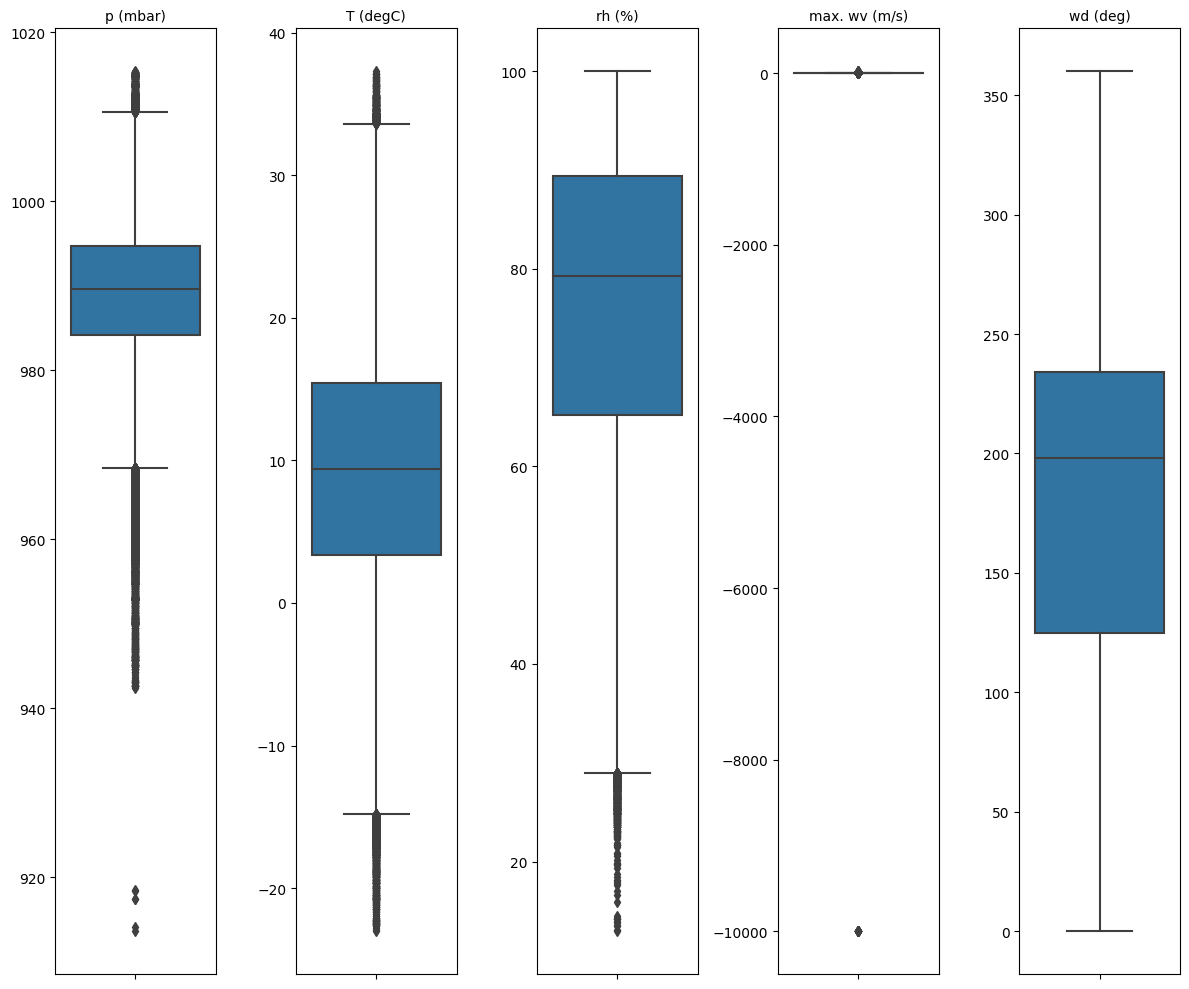

In [ ]:
# Select columns for box plot
selected_columns = ['p (mbar)', 'T (degC)',
       'rh (%)', 'max. wv (m/s)',
       'wd (deg)']

# Create subplots
fig, ax = plt.subplots(1, len(selected_columns), figsize=(12, 10))

# Generate boxplots for each column
for i, col in enumerate(selected_columns):
    sns.boxplot(y=col, data=df, ax=ax[i])
    ax[i].set_title(col, fontsize=10)
    ax[i].set_ylabel('')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

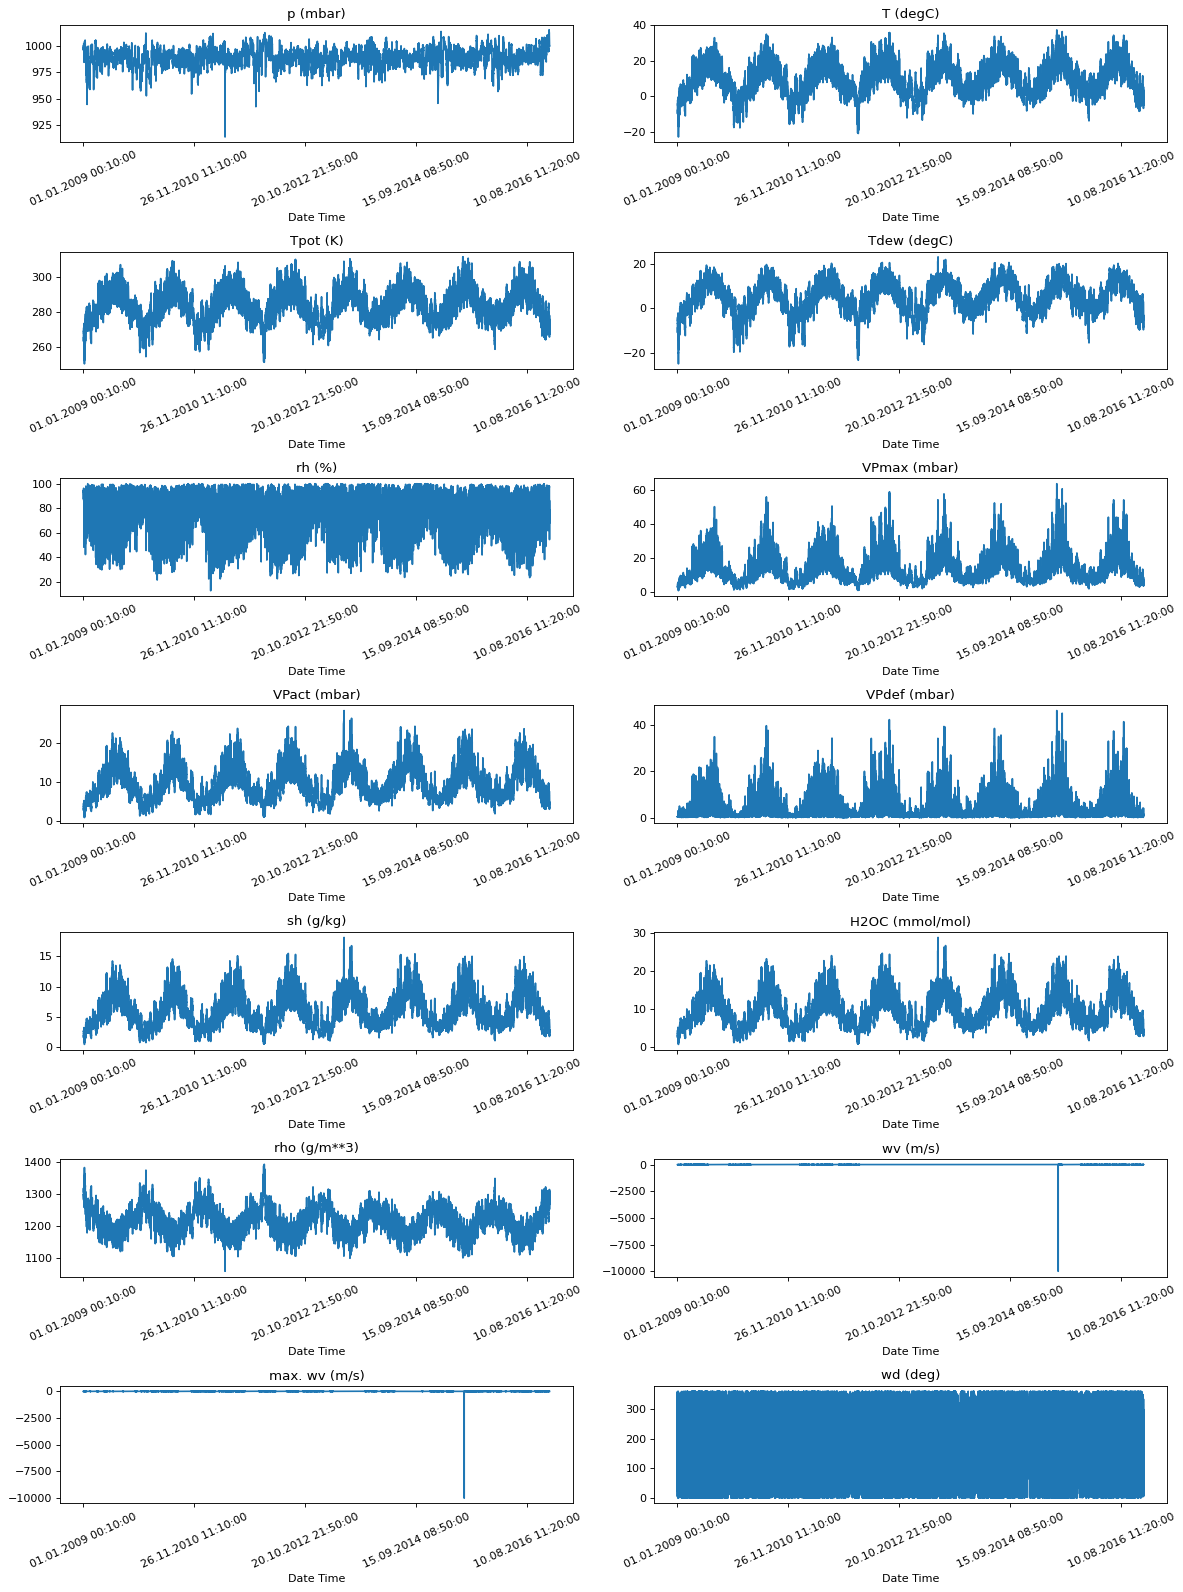

In [ ]:
# high level plot of all the features to see type of data
columns = ["p (mbar)",
          "T (degC)",
          "Tpot (K)",
          "Tdew (degC)",
          "rh (%)",
          "VPmax (mbar)",
          "VPact (mbar)",
          "VPdef (mbar)",
          "sh (g/kg)",
          "H2OC (mmol/mol)",
          "rho (g/m**3)",
          "wv (m/s)",
          "max. wv (m/s)",
          "wd (deg)",
]

date_time_key = "Date Time"

def all_data_Visualization(data, date_time_key, columns):
    # Extract the time data from the provided key
    time_data = data[date_time_key]

    # Create a subplot grid with 7 rows and 2 columns
    fig, axes = plt.subplots(nrows=7,
                             ncols=2,
                             figsize=(15, 20),
                             dpi=80,
                             facecolor="w",
                             edgecolor="k")

    # Iterate through the specified columns and plot their data
    for i, column in enumerate(columns):
        # Extract the data for the current column
        t_data = data[column]

        # Set the index of the data to be the time_data
        t_data.index = time_data

        # Display the first few rows of the data (for reference)
        t_data.head()

        # Plot the data in the current subplot
        ax = t_data.plot(ax=axes[i // 2, i % 2], title=column, rot=25)

    # Adjust the layout of subplots for better spacing
    plt.tight_layout()


all_data_Visualization(df)

As expected, the data shows seasonality in most of the data sets. A zoom in on the Temperature data is shown below

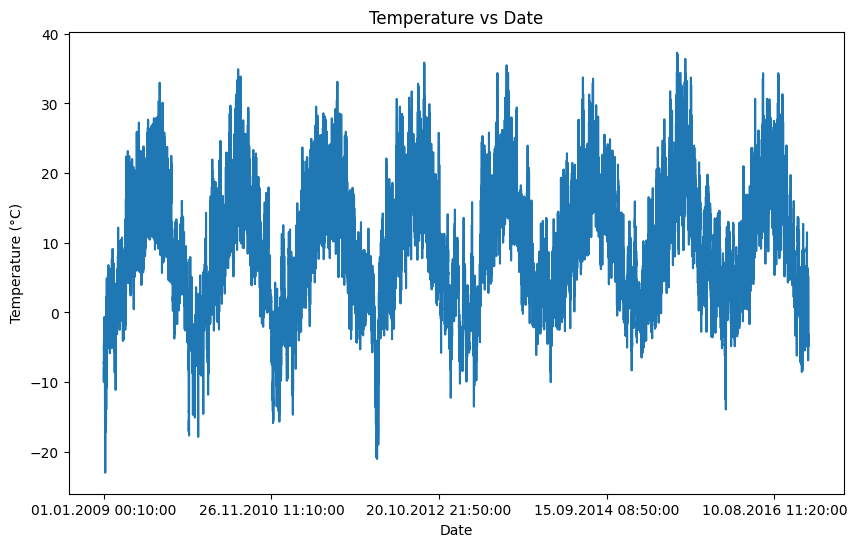

In [ ]:
# Plot the single variable Temperature data
temperature = df['T (degC)']
temperature.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs Date')
plt.show()

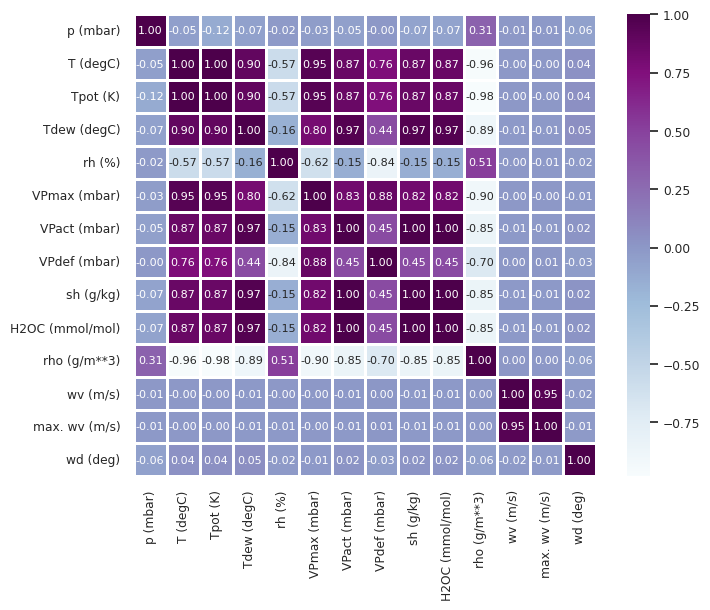

In [ ]:
## Correlation Matrix - relationship between factors

# Get the correlation coefficient
corr = df.corr()

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.set(font_scale=0.8)
    # plot custom CM
    ax = sns.heatmap(corr,
                     cbar=True,
                     square=True,
                     annot=True,
                     fmt='0.2f',
                     linewidths=.8,
                     cmap="BuPu",
                     annot_kws={'size': 8},

)

From the Heat Map, it is seen that there are a number of features that do not correlate well with the Temperature (T (deg C)). These are important for consideration when selecting features for input to the neural network. The best correlated parameters are shown below.

In [ ]:
# Confirm the selected parameters from the correlation matrix
print(
    "Selected features are:",
    ", ".join([columns[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)

Selected features are: p (mbar), T (degC), VPmax (mbar), VPdef (mbar), sh (g/kg), rho (g/m**3), wv (m/s)


## Data Preparation

For the prototype, a subset of the data will be taken to reduce the computational time during testing of the concepts. To achieve this, the data will be change averaged to an hourly datapoint.

The scales for the data are all different, so it is necessary to scale and normalise all inputs.

In [ ]:
# Normalise the Dataset
def normalise(data, train_split):
    """
    Function to normalise datapoints to mean and standardisation

    Input: dataframe of features used in training set
    Output: Normalised dataframe
    """
    # calc the mean of the training set
    data_mean = data[:train_split].mean(axis=0)
    # calc the SD of the training set
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [ ]:
# Define the fraction of data that will be used to train the model
train_fraction = 0.8
# Determine the number of records in the training set
train_split = int(train_fraction * int(df.shape[0]))
# To convert to hourly sampling, there are 6 observations per hour
step = 6

In [ ]:
# Define the number of days that will be sampled as past and into the future

# 5 days X 24 hours x 6 observations / hour = 720
past = 720

# 12 hours ahead at 6 observation / hour = 72
future = 72

In [ ]:
# Extract the columns selected by feature engineering
selected_features = [columns[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = df[selected_features]
# Index by the date
features.index = df[date_time_key]

features

,p (mbar),T (degC),VPmax (mbar),VPdef (mbar),sh (g/kg),rho (g/m**3),wv (m/s)
Date Time,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,3.33,0.22,1.94,1307.75,1.03
01.01.2009 00:20:00,996.57,-8.41,3.23,0.21,1.89,1309.80,0.72
01.01.2009 00:30:00,996.53,-8.51,3.21,0.20,1.88,1310.24,0.19
01.01.2009 00:40:00,996.51,-8.31,3.26,0.19,1.92,1309.19,0.34
01.01.2009 00:50:00,996.51,-8.27,3.27,0.19,1.92,1309.00,0.32
...,...,...,...,...,...,...,...
31.12.2016 23:20:00,1000.07,-4.05,4.52,1.22,2.06,1292.98,0.67
31.12.2016 23:30:00,999.93,-3.35,4.77,1.44,2.07,1289.44,1.14
31.12.2016 23:40:00,999.82,-3.16,4.84,1.55,2.05,1288.39,1.08


In [ ]:
# Normalise the features using the Normailise function
features = normalise(features.values, train_split)
# Convert the features to a dataframe
features = pd.DataFrame(features)
features.head()

,0,1,2,3,4,5,6
0,0.920265,-2.014791,-1.315945,-0.781813,-1.493066,2.243596,-0.728121
1,0.926252,-2.061017,-1.329331,-0.783958,-1.512045,2.294697,-0.929897
2,0.921462,-2.072869,-1.332008,-0.786102,-1.515841,2.305666,-1.274867
3,0.919068,-2.049164,-1.325315,-0.788247,-1.500658,2.279492,-1.177234
4,0.919068,-2.044423,-1.323977,-0.788247,-1.500658,2.274755,-1.190252


In [ ]:
#split out the training and validation data
train_data = features.loc[0 : train_split - 1]

val_data = features.loc[train_split:]

train_data

,0,1,2,3,4,5,6
0,0.920265,-2.014791,-1.315945,-0.781813,-1.493066,2.243596,-0.728121
1,0.926252,-2.061017,-1.329331,-0.783958,-1.512045,2.294697,-0.929897
2,0.921462,-2.072869,-1.332008,-0.786102,-1.515841,2.305666,-1.274867
3,0.919068,-2.049164,-1.325315,-0.788247,-1.500658,2.279492,-1.177234
4,0.919068,-2.044423,-1.323977,-0.788247,-1.500658,2.274755,-1.190252
...,...,...,...,...,...,...,...
336174,-0.098678,0.449405,0.215357,-0.258573,0.678137,-0.488472,-0.773683
336175,-0.110651,0.425699,0.189925,-0.310039,0.689525,-0.471022,-0.558890
336176,-0.113046,0.432811,0.197956,-0.305751,0.697116,-0.478251,-0.780192
336177,-0.115441,0.460072,0.227404,-0.254284,0.697116,-0.502930,-1.105636


In [ ]:
val_data

,0,1,2,3,4,5,6
336179,-0.122625,0.437552,0.203310,-0.299317,0.704708,-0.484982,-0.480784
336180,-0.120230,0.420958,0.184570,-0.333628,0.708504,-0.470025,-0.610962
336181,-0.122625,0.415032,0.179216,-0.352928,0.719891,-0.466037,-1.027530
336182,-0.119033,0.422143,0.185909,-0.367939,0.746462,-0.472767,-0.676050
336183,-0.121428,0.412661,0.176539,-0.415116,0.784420,-0.466785,-0.604453
...,...,...,...,...,...,...,...
420219,1.345323,-1.544235,-1.156658,-0.567371,-1.447516,1.875415,-0.962441
420220,1.328560,-1.461265,-1.123194,-0.520193,-1.443721,1.787171,-0.656524
420221,1.315390,-1.438745,-1.113824,-0.496605,-1.451312,1.760997,-0.695577
420222,1.314192,-1.565570,-1.164689,-0.558793,-1.474087,1.889873,-0.428713


In [ ]:
# Training Dataset
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(7)]].values
y_train = features.iloc[start:end][[1]]

sequence_length = int(past / step)

In [ ]:
# Model Parameters
learning_rate = 0.001
batch_size = 256

from keras.preprocessing.sequence import TimeseriesGenerator
# prepare the training set - A batch dataset type using a generator
dataset_train = TimeseriesGenerator(
    data=x_train,
    targets=y_train,
    length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size
)

In [ ]:
# prepare the Validation set

# Subtract the last 792 data points, as there are no data records for that data
x_end = len(val_data) - past - future

# Add 792 to the dataset to start after the training split
label_start = train_split + past + future


x_val = val_data.iloc[:x_end][[i for i in range(7)]].values
y_val = features.iloc[label_start:][[1]]

# A batch dataset type
# Create a time series dataset for validation from input data
dataset_val = TimeseriesGenerator(
    data=x_val,
    targets=y_val,
    length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size
)

# Retrieve the first batch from the training dataset
for batch in dataset_train.take(1):
    inputs, targets = batch

In [ ]:
mae = np.mean(np.abs(y_val))
print(mae)


1    0.814375
dtype: float64


The simple mean average gives a MAE of 0.81.

# 5. Baseline Model (Average and CNN)

In [ ]:
# Average of 24hours previous to predict future

# Code from Chollet - used to learn about timeseries
float_data = np.zeros((len(lines), len(header)-1))
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(',')[1:]]
  float_data[i, :] = values

In [ ]:
# Normalise the Data

# Code from Chollet - used to learn about timeseries
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [ ]:
# Code from Chollet - used to learn about timeseries

def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    """
    Data generator to get time series batches.

    """
    # Delimit the indices that define the time series - segmenting the data
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets


In [ ]:
# Code from Chollet - used to learn about timeseries

# Training, Validation and Testing generators
# Training: takes the first 200,000 datapoints
# Validation : takes the next 100,000 datapoints
# Test: takes remaining datapoints

lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (300000 - 200001 - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [ ]:
# Built  from basis in Chollet - used to learn about timeseries

def average_baseline():
    """
    Common sense average: Temperature in 24 hours will be the same as now
    """
    # To collect the calculated MAEs
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        # Calculation for MAE
        mae = np.mean(np.abs(preds - targets))
        # Add the MAE to the list
        batch_maes.append(mae)
    # Calculate the mean and print
    mean_MAE = np.mean(batch_maes)
    print(mean_MAE)

average_baseline()


0.28973597299053566


MAE = 0.29 from 24hour average

In [ ]:
# CNN Sequential Model - Used for baseline - used to learn about timeseries

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 16s 31ms/step - loss: 1.5498 - val_loss: 0.6513
Epoch 2/20
500/500 [==============================] - 17s 34ms/step - loss: 0.4632 - val_loss: 0.3063
Epoch 3/20
500/500 [==============================] - 18s 36ms/step - loss: 0.2913 - val_loss: 0.3052
Epoch 4/20
500/500 [==============================] - 16s 31ms/step - loss: 0.2649 - val_loss: 0.3110
Epoch 5/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2510 - val_loss: 0.3096
Epoch 6/20
500/500 [==============================] - 17s 34ms/step - loss: 0.2418 - val_loss: 0.3171
Epoch 7/20
500/500 [==============================] - 18s 37ms/step - loss: 0.2364 - val_loss: 0.3499
Epoch 8/20
500/500 [==============================] - 17s 35ms/step - loss: 0.2298 - val_loss: 0.3399
Epoch 9/20
500/500 [==============================] - 18s 35ms/step - loss: 0.2262 - val_loss: 0.3230
Epoch 10/20
500/500 [==============================] - 15s 29ms/step - loss: 0.222

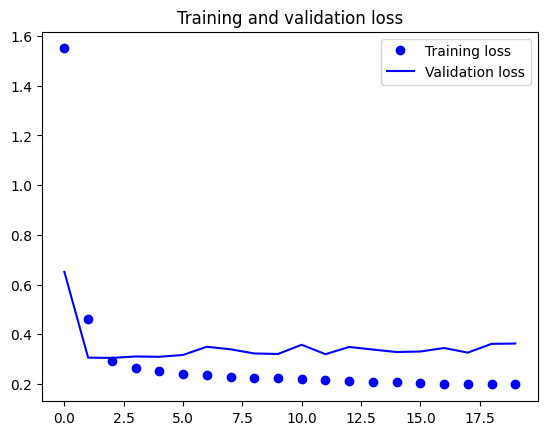

In [ ]:
#plot the loss function - used to learn about timeseries

def visualise_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')

    # plot the labels
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    #show chart elements
    plt.legend()
    plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']

visualise_loss(history)

#epochs = range(len(loss))

#plt.figure()

#plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
#plt.title('Training and validation loss')
#plt.legend()

#plt.show()

The baseline model performs very poorly, which is not surprising given the periodic nature of the

MAE = 0.35 from CNN

# 2. LSTM Model

In [ ]:
# This is my code

# Training - Define the model
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
# Single LSTM layer
lstm_out = keras.layers.LSTM(32)(inputs)
# Output to a single number
outputs = keras.layers.Dense(1)(lstm_out)

# Model configuration
model = keras.Model(inputs=inputs, outputs=outputs)
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 lstm (LSTM)                 (None, 32)                5120      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Checkpoint/callback method adapted from Chollet

# Implements early stopping and model checkpointing. It trains the model for a
#specified number of epochs, monitoring its performance on a validation dataset
# and saving the best model weights to a file. Early stopping helps prevent
#overfitting by stopping training when the model's performance on the
#validation dataset starts to degrade.

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss",
                                            min_delta=0,
                                            patience=5)

epochs = 10

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

# Run the model defined above
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
1311/1311 [==============================] - ETA: 0s - loss: 0.2182
Epoch 1: val_loss improved from inf to 0.16939, saving model to model_checkpoint.h5
1311/1311 [==============================] - 214s 161ms/step - loss: 0.2182 - val_loss: 0.1694
Epoch 2/10
1311/1311 [==============================] - ETA: 0s - loss: 0.1310
Epoch 2: val_loss improved from 0.16939 to 0.16283, saving model to model_checkpoint.h5
1311/1311 [==============================] - 200s 153ms/step - loss: 0.1310 - val_loss: 0.1628
Epoch 3/10
1311/1311 [==============================] - ETA: 0s - loss: 0.1211
Epoch 3: val_loss improved from 0.16283 to 0.15770, saving model to model_checkpoint.h5
1311/1311 [==============================] - 200s 153ms/step - loss: 0.1211 - val_loss: 0.1577
Epoch 4/10
1311/1311 [==============================] - ETA: 0s - loss: 0.1163
Epoch 4: val_loss improved from 0.15770 to 0.15209, saving model to model_checkpoint.h5
1311/1311 [==============================] - 207s 1

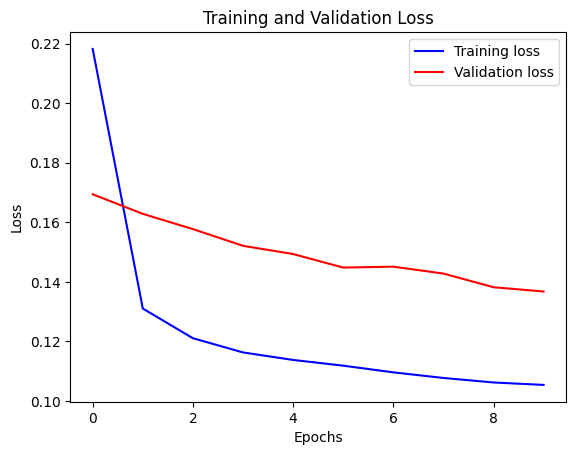

In [ ]:
# Function to plot loss charts
def visualize_loss(history, title):
    """

    Input: History Data object
    Output: Plotted visual
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))

    # Generate the graph
    plt.figure()
    plt.plot(epochs, loss, "blue", label="Train loss")
    plt.plot(epochs, val_loss, "red", label="Val loss")

    # Graph labeling
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

    # Display properties
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

8/8 [==============================] - 1s 22ms/step


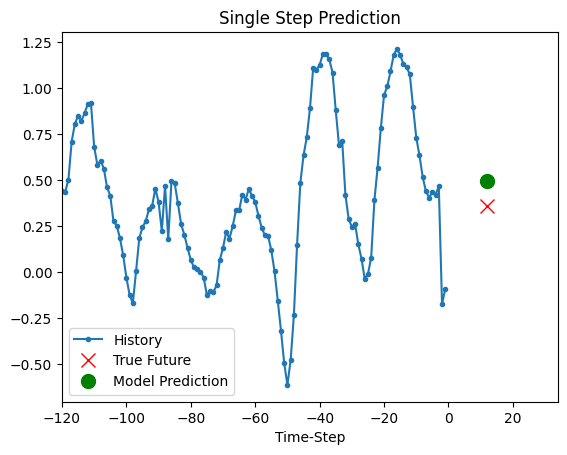

8/8 [==============================] - 0s 21ms/step


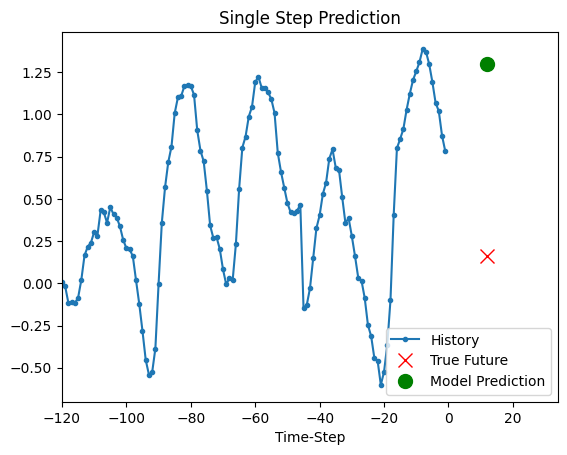

8/8 [==============================] - 0s 15ms/step


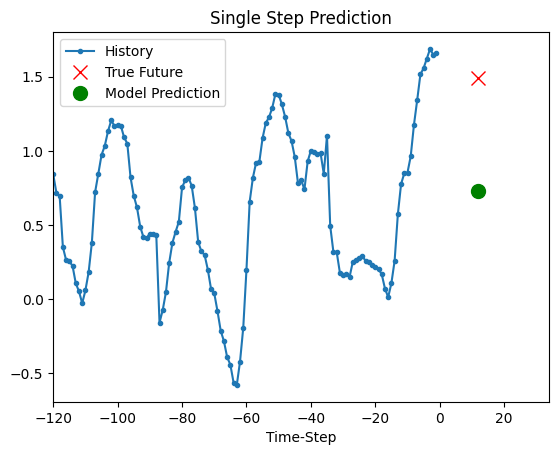

8/8 [==============================] - 0s 13ms/step


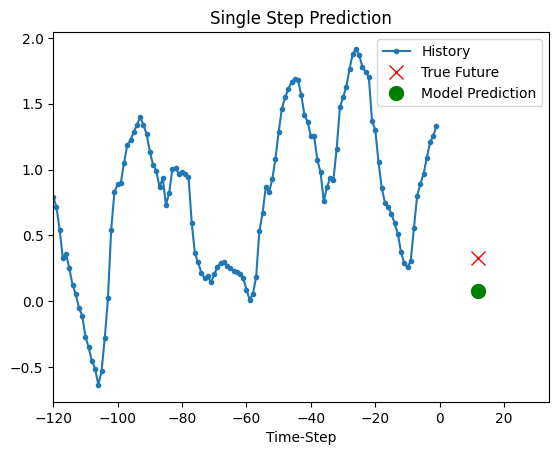

8/8 [==============================] - 0s 14ms/step


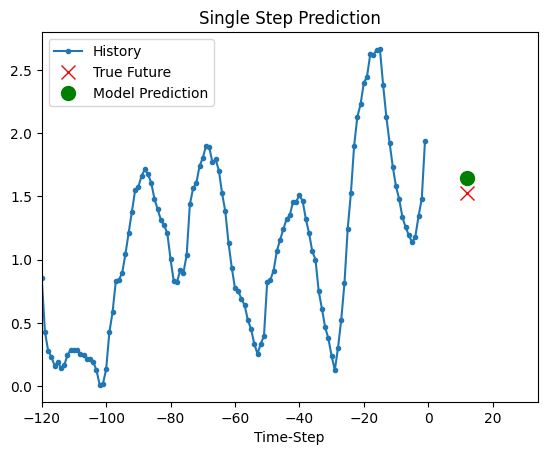

In [ ]:
# Plot through datasets
def show_plots(plot_data, future_steps, title):
    """
    Display a time series plot with historical data, true future values, and
    model predictions.

    Parameters:
        plot_data (list of numpy arrays): A list containing three arrays
        - historical data, true future values, and model predictions.
        Each array should represent the values at different time steps.
        future_steps (int):
        The number of future time steps for which predictions are available.
        title (str): The title of the plot.

    Returns:
        None

    Usage:
        show_plot([history_data, true_future_data, model_predictions],
        future_steps, "Time Series Plot")
    """

    labels = ["History", "True Future", "Model Prediction"]
    markers = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future_steps,
                     plot_data[i],
                     markers[i],
                     markersize=10,
                     label=labels[i])
        else:
            plt.plot(time_steps,
                     plot_data[i].flatten(),
                     markers[i],
                     label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future_steps + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()

# Assuming dataset_val contains the validation data
for x, y in dataset_val.take(5):
    show_plots(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        future_steps=12,
        title="Single Step Prediction",
    )


# Chollet Version - for reference

#def show_plot(plot_data, delta, title):
#    labels = ["History", "True Future", "Model Prediction"]
#    marker = [".-", "rx", "go"]
#    time_steps = list(range(-(plot_data[0].shape[0]), 0))
#    if delta:
#        future = delta
#    else:
#        future = 0
#
#    plt.title(title)
#    for i, val in enumerate(plot_data):
#        if i:
#            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
#        else:
#            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
#    plt.legend()
#    plt.xlim([time_steps[0], (future + 5) * 2])
#    plt.xlabel("Time-Step")
#    plt.show()
#    return


#for x, y in dataset_val.take(5):
#    show_plot(
#        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
#        12,
#        "Single Step Prediction",
#    )

LSTM Model Optimisation

In [ ]:
# gridsearch for optimium hyper-paramter values
from sklearn.model_selection import GridSearchCV

# Specify hyperparameter grid for the grid search
param_grid = {
    'learning_rate': [0.1, 0.5, 0.01],
    'optimizer': ['adam', 'rmsprop']
}

# Create the LSTM model
model = tf.keras.wrappers.scikit_learn.KerasRegressor(model, epochs=10, batch_size=32, verbose=0)

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)  # Replace X_train and y_train with your training data

# Get the results and print to a CSV file
results = pd.DataFrame(grid_search.cv_results_)
results.to_csv('grid_search_results.csv', index=False)

# Print the best hyperparameters and corresponding mean squared error
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_
print("Best Hyperparameters:")
print(best_params)
print("Best Mean Squared Error:", best_mse)


Cross-validation (Rolling Cross-validation

In [ ]:
# Validation to the Test_set

# Iterate through the test set with rolling validation

for i in range(len(test_data) - sequence_length):
    # Define the training and validation sets for the current iteration
    train_subset = train_data.append(test_data.iloc[:i])  # Include past data for training
    validation_subset = test_data.iloc[i:i+sequence_length]  # Future data for validation

    # Prepare the data for training
    X_train = train_subset['value'].values
    X_train = np.reshape(X_train, (len(X_train), 1))
    y_train = train_subset['value'].values

    # Prepare the data for validation
    X_val = validation_subset['value'].values
    X_val = np.reshape(X_val, (len(X_val), 1))
    y_val = validation_subset['value'].values

    # Create and train the LSTM model
    model = Sequential()
    model.add(LSTM(64, input_shape=(sequence_length, num_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Make predictions on the validation set
    y_pred = model.predict(X_val)

    # Calculate and store the validation MSE
    mse = mean_squared_error(y_val, y_pred)
    validation_mses.append(mse)

# Calculate the mean validation MSE over all iterations
mean_validation_mse = np.mean(validation_mses)
print("Mean Validation MSE:", mean_validation_mse)

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")

In [7]:
# re-comfirm the base data
print("DataFrame Shape: {} rows, {} columns".format(*df_raw.shape))
display(df_raw.head())

DataFrame Shape: 420551 rows, 15 columns


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [8]:
# This section uses the following tutorial for inspiration -
# https://www.kaggle.com/code/nicapotato/keras-timeseries-multi-step-multi-output/notebook
# however, all codes is my own implementation

# Data Loader Parameters
BATCH_SIZE = 256
BUFFER_SIZE = 10000
TRAIN_SPLIT = 300000

# LSTM Parameters
EVALUATION_INTERVAL = 200
EPOCHS = 4
PATIENCE = 5

# Reproducibility
SEED = 13
tf.random.set_seed(SEED)

In [10]:
# Instead of a generator, a function to create the time slices will be used.

def multivariate_data(dataset, target, start_index, end_index,
                      history_size, target_size, step, single_step=False):
    """
    Create multivariate time series data for training a machine learning model.

    Parameters:
        dataset (numpy array): The input dataset containing multiple features.
        target (numpy array): The target variable to be predicted.
        start_index (int): The starting index of the data to be considered.
        end_index (int): The ending index of the data to be considered.
        history_size (int): The number of past time steps to use as input.
        target_size (int): The number of future time steps to predict.
        step (int): The interval between time steps.
        single_step (bool): True if predicting a single future time step,
        False for a sequence.

    Returns:
        numpy array: Input data sequences.
        numpy array: Corresponding target values.

    Usage:
        x_train, y_train = multivariate_data(train_data, train_targets,
        start_index, end_index, history_size, target_size, step)
    """

    data = []   # Store input data sequences
    labels = []  # Store corresponding target values

    start_index = start_index + history_size  # Adjust the start index

    # If end_index is not specified, set it to the length of the dataset minus target_size
    if end_index is None:
        end_index = len(dataset) - target_size

    # Iterate through the data to create sequences
    for i in range(start_index, end_index):
        # Create a list of indices for the past time steps
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])

        # Depending on single_step, either predict a single future time step or a sequence
        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i:i + target_size])

    # Convert data and labels to numpy arrays and return
    return np.array(data), np.array(labels)

In [12]:
#Extract the features of interest

features_extracted = ['p (mbar)', 'T (degC)', 'rho (g/m**3)']

In [15]:
# View features_extracted to confirm values and data-type

features = df_raw[features_extracted]
features.index = df_raw['Date Time']
features.head()

,p (mbar),T (degC),rho (g/m**3)
Date Time,,,
01.01.2009 00:10:00,996.52,-8.02,1307.75
01.01.2009 00:20:00,996.57,-8.41,1309.80
01.01.2009 00:30:00,996.53,-8.51,1310.24
01.01.2009 00:40:00,996.51,-8.31,1309.19
01.01.2009 00:50:00,996.51,-8.27,1309.00


In [16]:
# Split the data on the given training time step.

dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (dataset-data_mean)/data_std

In [17]:
# Use the function to

past_history = 720
future_target = 72
STEP = 6

x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [19]:
print ('Single windowhistory : {}'.format(x_train_multi[0].shape),
       'Target temperature : {}'.format(y_train_multi[0].shape),
       sep='\n')

(299280, 120, 3)
(299280, 72)
Single window of past history : (120, 3)
Target temperature to predict : (72,)


In [21]:
def multi_step_plot(history, true_future, prediction):
    """
    Plot a multi-step time series forecast.
    Parameters:
        history (numpy array): Historical time series data.
        true_future (numpy array): True future values to be compared.
        prediction (numpy array): Predicted future values (optional).

    Returns:
        None

    Usage:
        multi_step_plot(history_data, true_future_data, predicted_data)
    """
    plt.figure(figsize=(18, 6))

    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out) / STEP, np.array(true_future), 'bo', label='True Future')

    if prediction is not None:
        plt.plot(np.arange(num_out) / STEP, np.array(prediction), 'ro', label='Predicted Future')

    plt.legend(loc='upper left')
    plt.show()

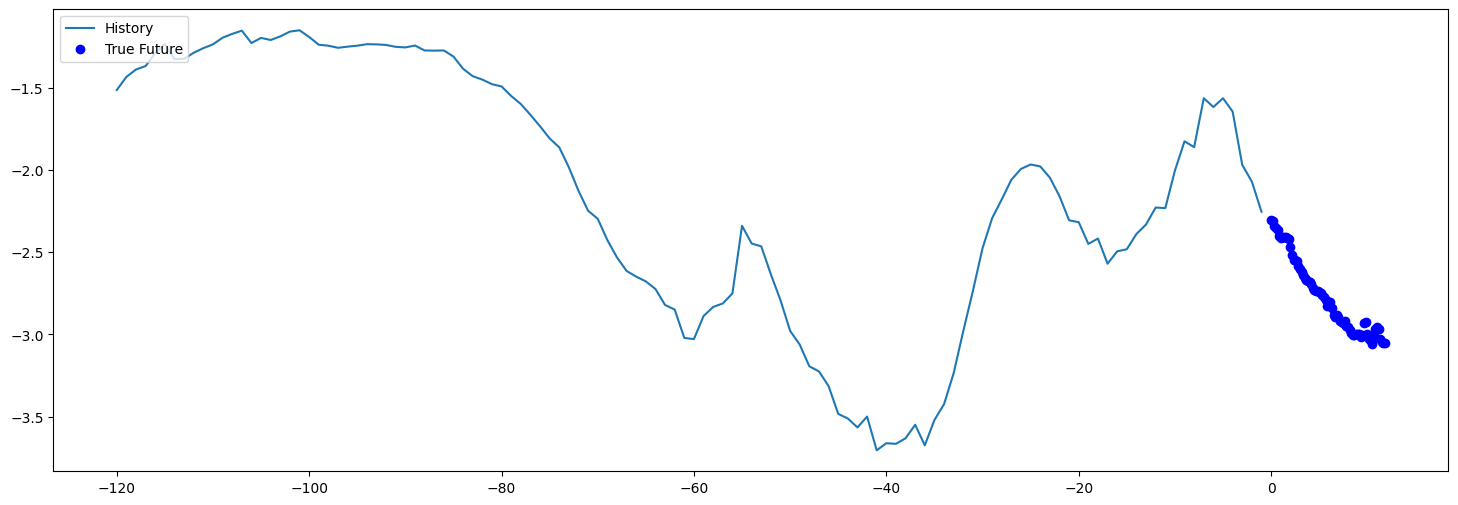

In [24]:
# plot out a selection of the graphs to show the training and actual data

for x, y in train_data_multi.take(1):
    multi_step_plot(x[0], y[0], np.array([0]))

In [28]:
# Fit the model

from tensorflow.keras.callbacks import CSVLogger, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience = 3, restore_best_weights=True)
multi_step_history = multi_step_model.fit(train_data_multi,
                                          epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=EVALUATION_INTERVAL,
                                          callbacks=[early_stopping])

Epoch 1/4
200/200 [==============================] - 56s 256ms/step - loss: 0.4968 - val_loss: 0.3827
Epoch 2/4
200/200 [==============================] - 50s 251ms/step - loss: 0.3304 - val_loss: 0.3363
Epoch 3/4
200/200 [==============================] - 55s 275ms/step - loss: 0.3092 - val_loss: 0.2926
Epoch 4/4
200/200 [==============================] - 48s 240ms/step - loss: 0.2518 - val_loss: 0.2552


In [30]:
# Plot the data

def plot_train_history(history, title):
      """
    Plot training and validation loss over epochs.

    Parameters:
        history (tf.keras.callbacks.History): History object containing
        training and validation loss.
        title (str): Title for the plot.

    Returns:
        None

    Usage:
        plot_train_history(model_history, "Training and Validation Loss")
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

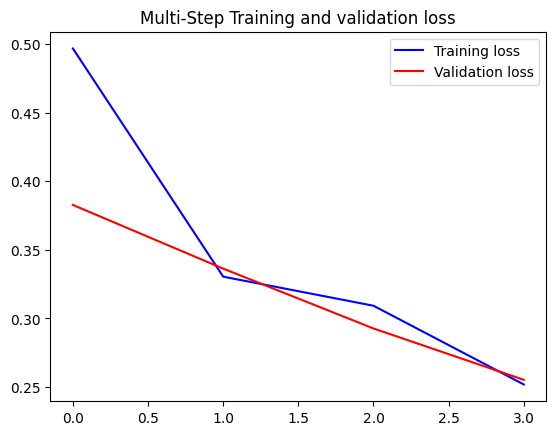

In [31]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

8/8 [==============================] - 0s 23ms/step


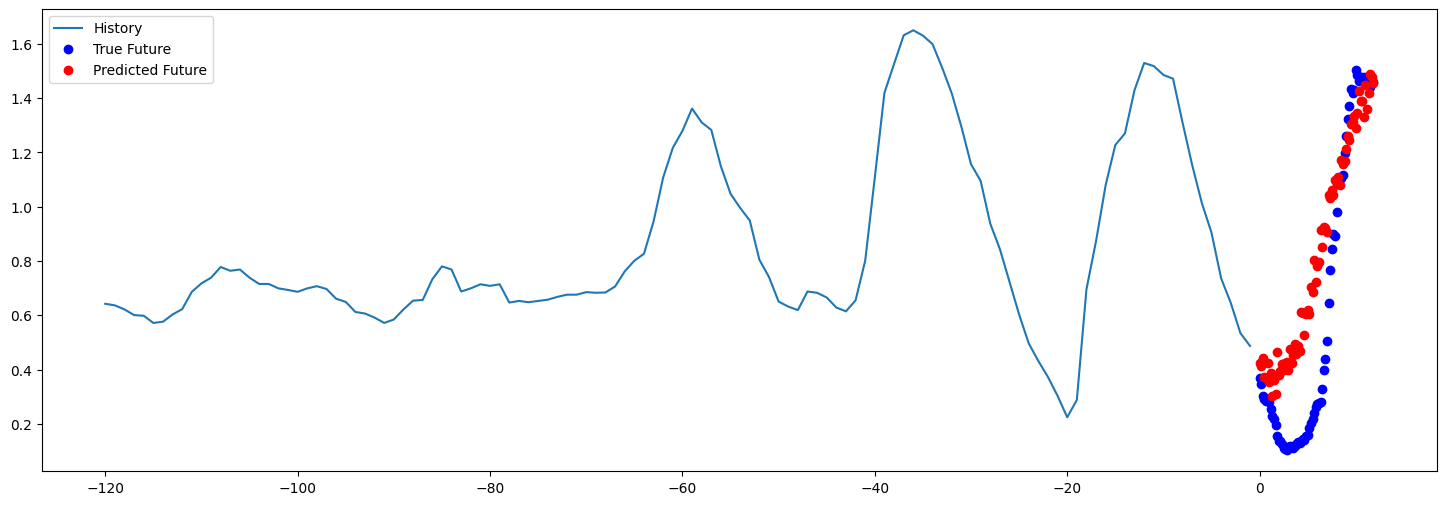

8/8 [==============================] - 0s 21ms/step


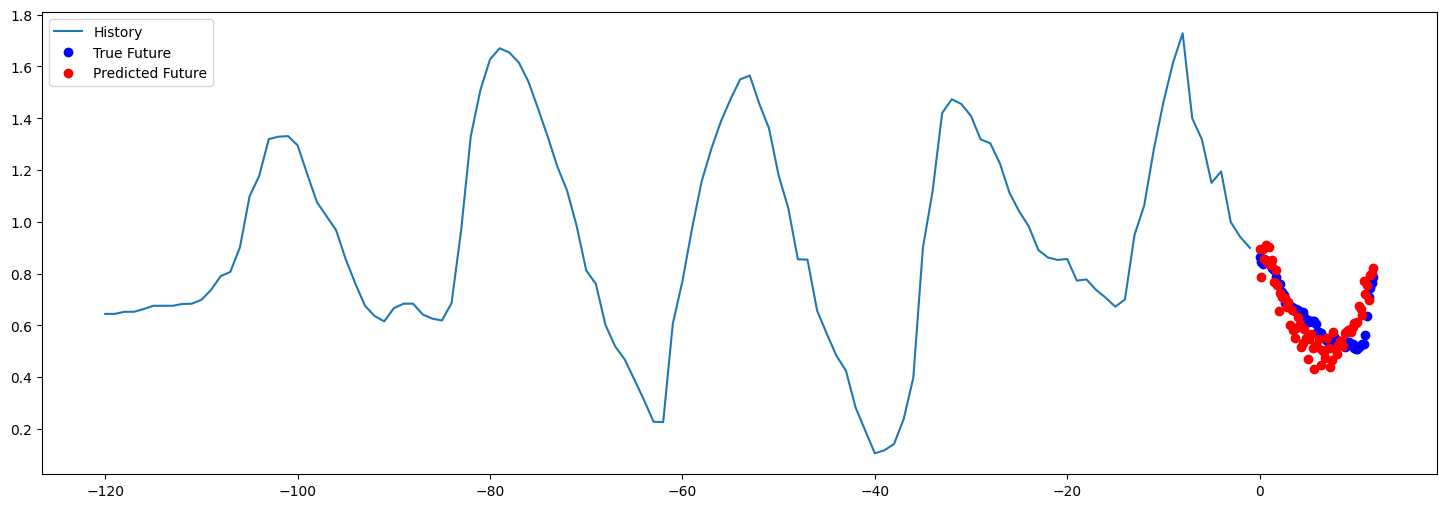

8/8 [==============================] - 0s 23ms/step


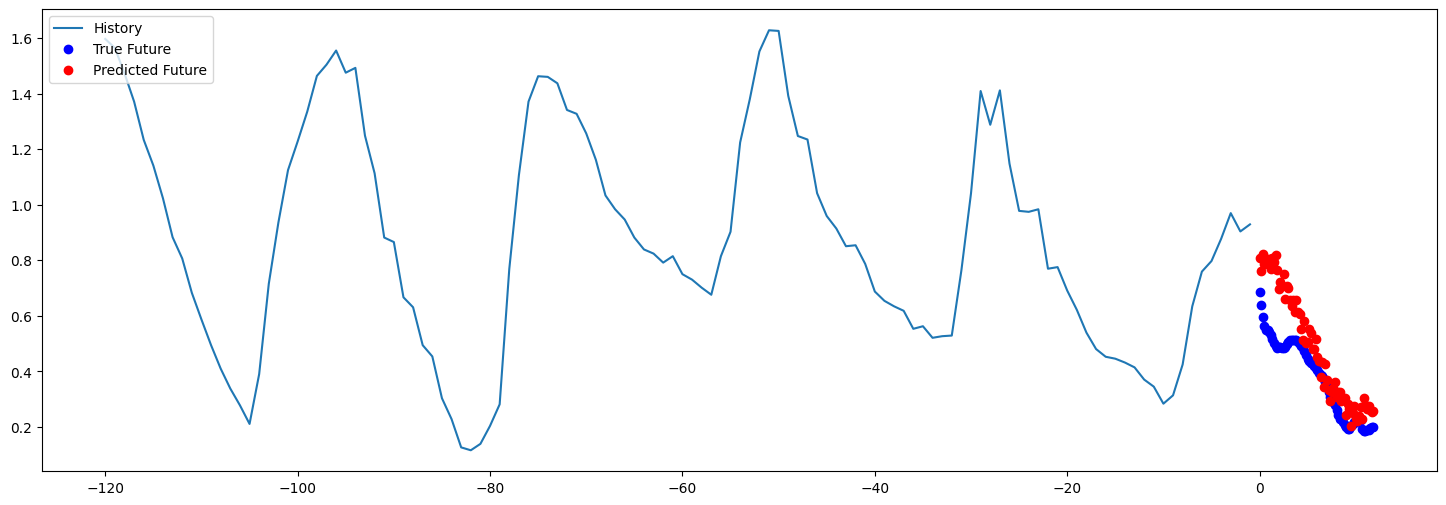

In [32]:
# Plot the prediction with the Actuals

def visualize_multi_step_predictions(val_data, model, num_samples=3):
    """
    Visualize multi-step predictions from a model on validation data.

    Parameters:
        val_data (tf.data.Dataset): Validation data as a tf.data.Dataset.
        model (tf.keras.Model): The trained multi-step prediction model.
        num_samples (int): Number of samples to visualize.

    Returns:
        None
    """
    for x, y in val_data.take(num_samples):
        prediction = model.predict(x)[0]  # Predict the next step
        multi_step_plot(x[0], y[0], prediction)

visualize_multi_step_predictions(val_data_multi,
                                 multi_step_model,
                                 num_samples=3)

# 3. Multi-Output LSTM Model

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 120, 7)]     0           []                               
                                                                                                  
 lstm_23 (LSTM)                 (None, 120, 32)      5120        ['input_13[0][0]']               
                                                                                                  
 dense_41 (Dense)               (None, 120, 1)       33          ['lstm_23[0][0]']                
                                                                                                  
 dense_42 (Dense)               (None, 120, 1)       33          ['lstm_23[0][0]']                
                                                                                           

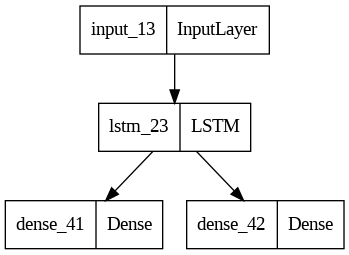

In [ ]:
# functional API model for multi-output model

# input layer
visible = Input(shape=(inputs.shape[1], inputs.shape[2]))
# hidden layer processing
layer1 = LSTM(32, return_sequences=True)(visible)
# Temperature output
output1 = Dense(1, activation='linear')(layer1)
# Pressure output
output2 = Dense(1, activation='linear')(layer1)
# output
model = Model(inputs=visible, outputs=[output1, output2])
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multi_output.png')


In [33]:
# My implementation - but with inspiration from Tutorial

def multivariate_multioutput_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
    """
    Create multivariate multi-output time series data for training a machine learning model.

    Parameters:
        dataset (numpy array): The input dataset containing multiple features.
        target (numpy array): The target variable(s) to be predicted.
        start_index (int): The starting index of the data to be considered.
        end_index (int): The ending index of the data to be considered.
        history_size (int): The number of past time steps to use as input.
        target_size (int): The number of future time steps to predict.
        step (int): The interval between time steps.
        single_step (bool): True if predicting a single future time step, False for a sequence.

    Returns:
        numpy array: Input data sequences.
        numpy array: Corresponding target values.

    Usage:
        x_train, y_train = multivariate_multioutput_data(train_data, train_targets, start_index, end_index, history_size, target_size, step)
    """
    data = []   # Store input data sequences
    labels = []  # Store corresponding target values

    start_index = start_index + history_size  # Adjust the start index

    # If end_index is not specified, set it to the length of the dataset minus target_size
    if end_index is None:
        end_index = len(dataset) - target_size

    # Iterate through the data to create sequences
    for i in range(start_index, end_index):
        # Create a list of indices for the past time steps
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])

        # Depending on single_step, either predict a single future time step or a sequence
        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i:i + target_size])

    # Convert data and labels to numpy arrays and add dimensions for compatibility with models
    return np.array(data)[:, :, :, np.newaxis, np.newaxis], np.array(labels)[:, :, :, np.newaxis, np.newaxis]

def multi_step_output_plot(history, true_future, prediction):
    """
    Plot multi-step predictions for a multivariate multi-output time series.

    Parameters:
        history (numpy array): Historical time series data.
        true_future (numpy array): True future values to be compared.
        prediction (numpy array): Predicted future values (optional).

    Returns:
        None
    """
    plt.figure(figsize=(18, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    for i, (var, c) in enumerate(zip(features.columns[:2], ['b', 'r'])):
        plt.plot(num_in, np.array(history[:, i]), c, label=var)
        plt.plot(np.arange(num_out) / STEP, np.array(true_future[:, i]), c+'o', markersize=5, alpha=0.5,
                 label=f"True {var.title()}")
        if prediction.any():
            plt.plot(np.arange(num_out) / STEP, np.array(prediction[:, i]), '*', markersize=5, alpha=0.5,
                     label=f"Predicted {var.title()}")

    plt.legend(loc='upper left')
    plt.show()

In [34]:
# split the data set

# Define the future target (number of future time steps to predict)
future_target = 72

# Create training data and labels
x_train_multi, y_train_multi = multivariate_multioutput_data(
    dataset[:,:2],  # Input features (selecting first 2 columns)
    dataset[:,:2],  # Target variables (selecting first 2 columns)
    start_index=0,
    end_index=TRAIN_SPLIT,
    history_size=past_history,
    target_size=future_target,
    step=STEP
)

# Create validation data and labels
x_val_multi, y_val_multi = multivariate_multioutput_data(
    dataset[:,:2],  # Input features (selecting first 2 columns)
    dataset[:,:2],  # Target variables (selecting first 2 columns)
    start_index=TRAIN_SPLIT,
    end_index=None,
    history_size=past_history,
    target_size=future_target,
    step=STEP
)

In [35]:
print ('Single window history : {}'.format(x_train_multi[0].shape),
       'Target predict : {}'.format(y_train_multi[0].shape),
       sep='\n')

(299280, 120, 2, 1, 1)
(299280, 72, 2, 1, 1)
(119759, 120, 2, 1, 1)
(119759, 72, 2, 1, 1)
Single window of past history : (120, 2, 1, 1)
Target temperature to predict : (72, 2, 1, 1)


In [36]:
# data pipeline for training and validating
# They define the batch size, load and preprocess the training and
# validation data

BATCH_SIZE = 128

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi,
                                                       y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi,
                                                     y_val_multi))

val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

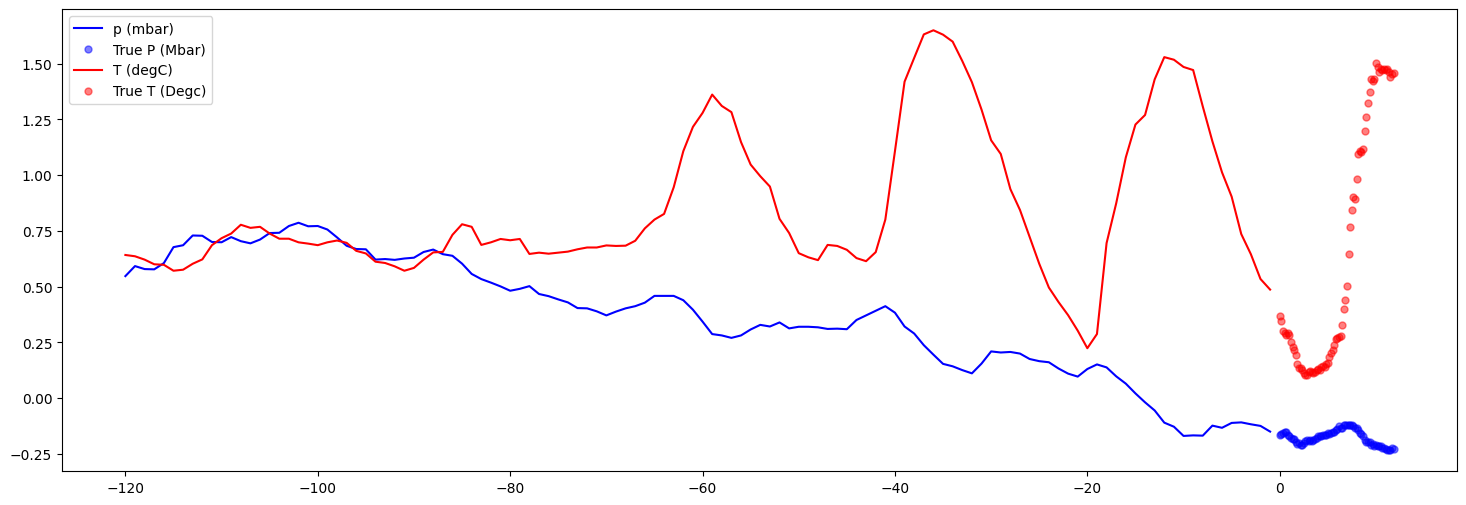

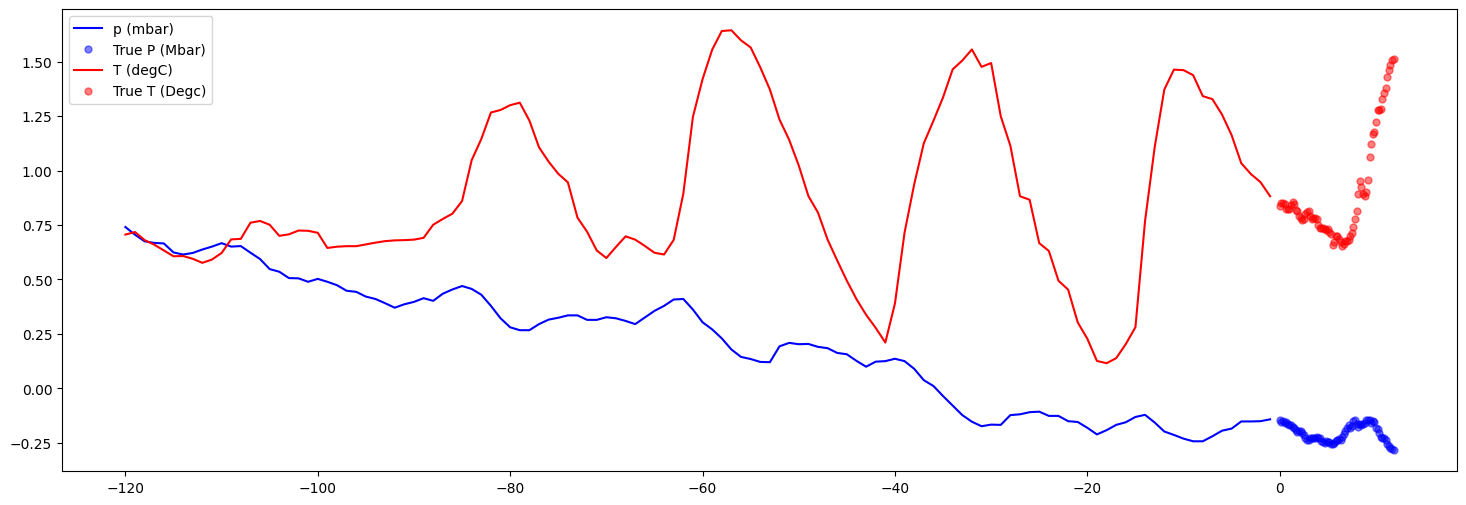

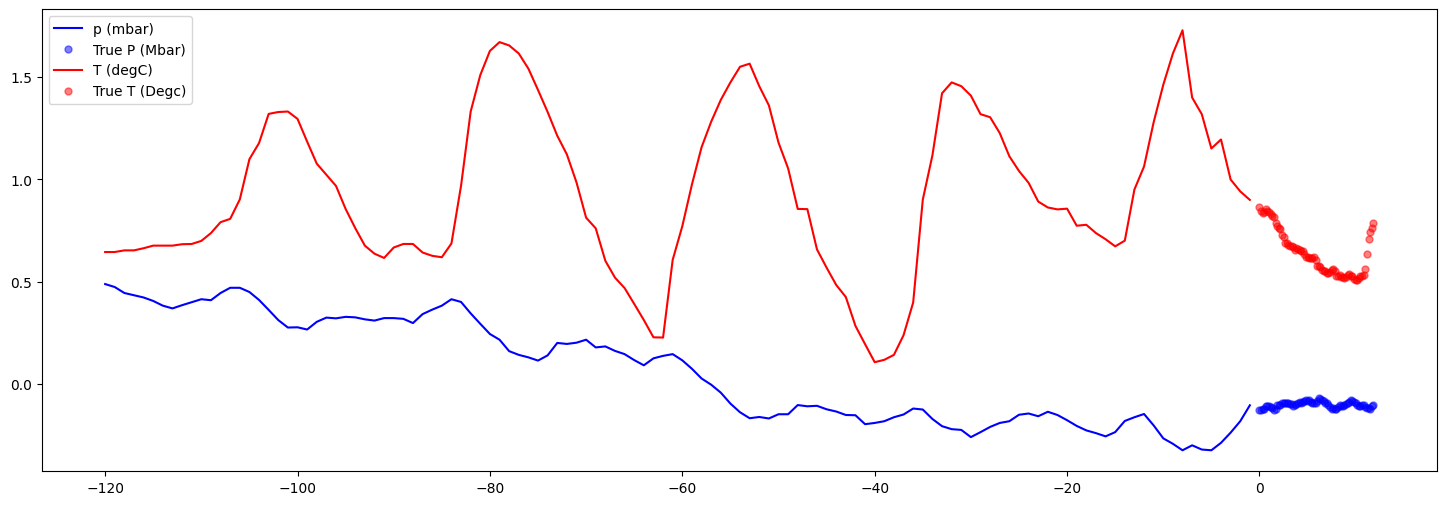

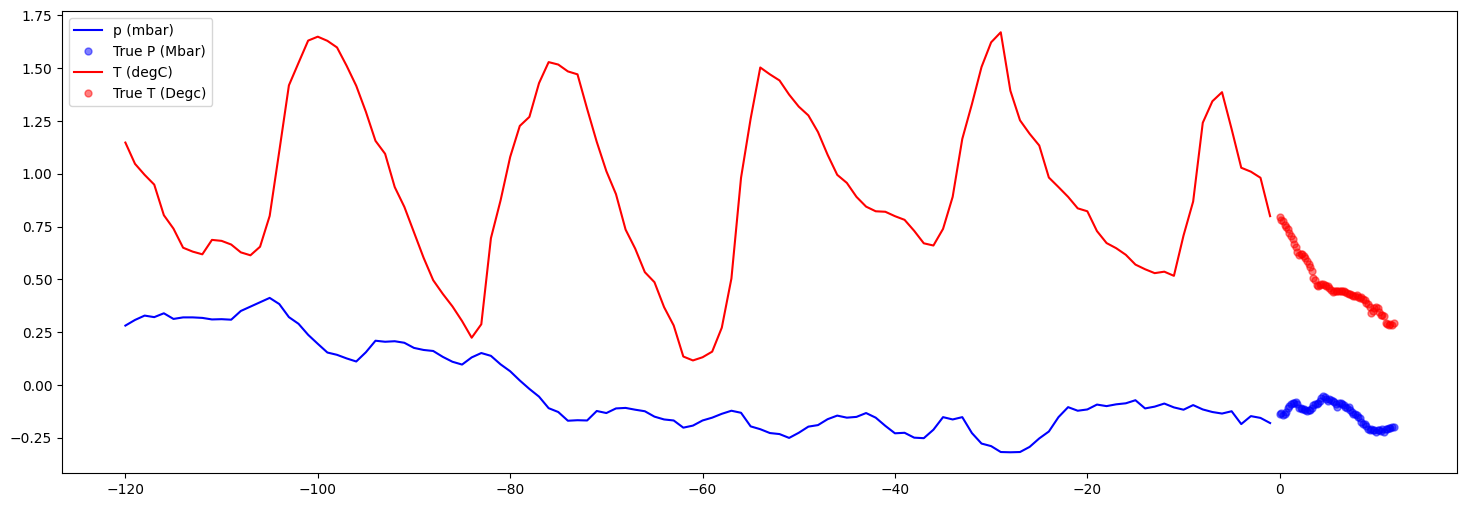

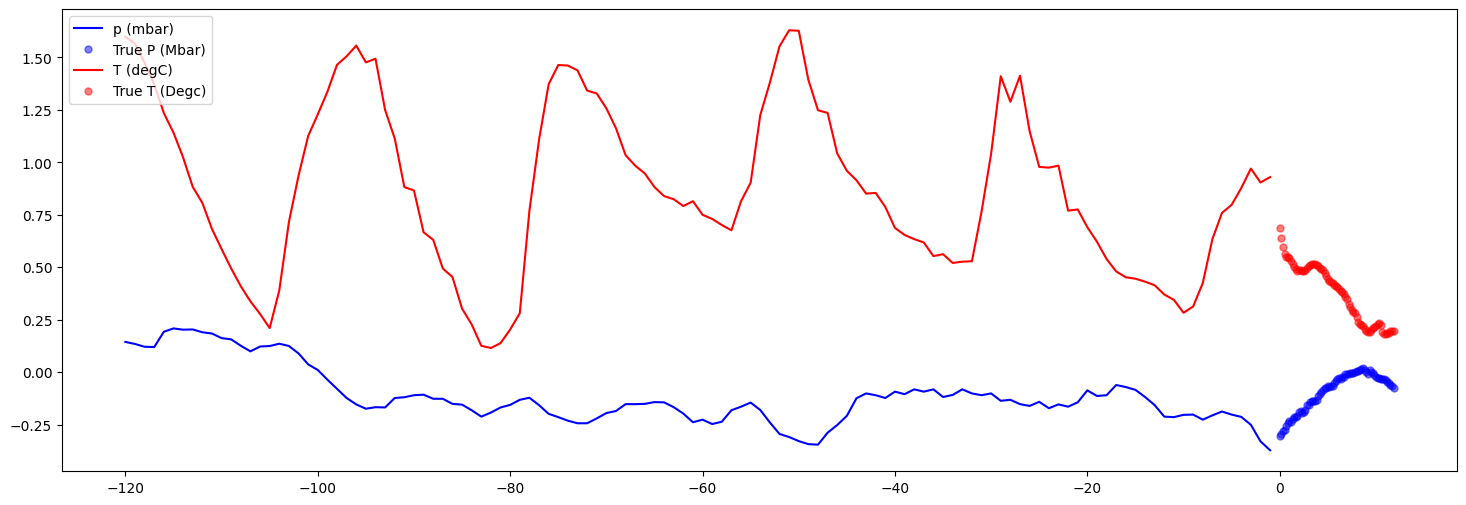

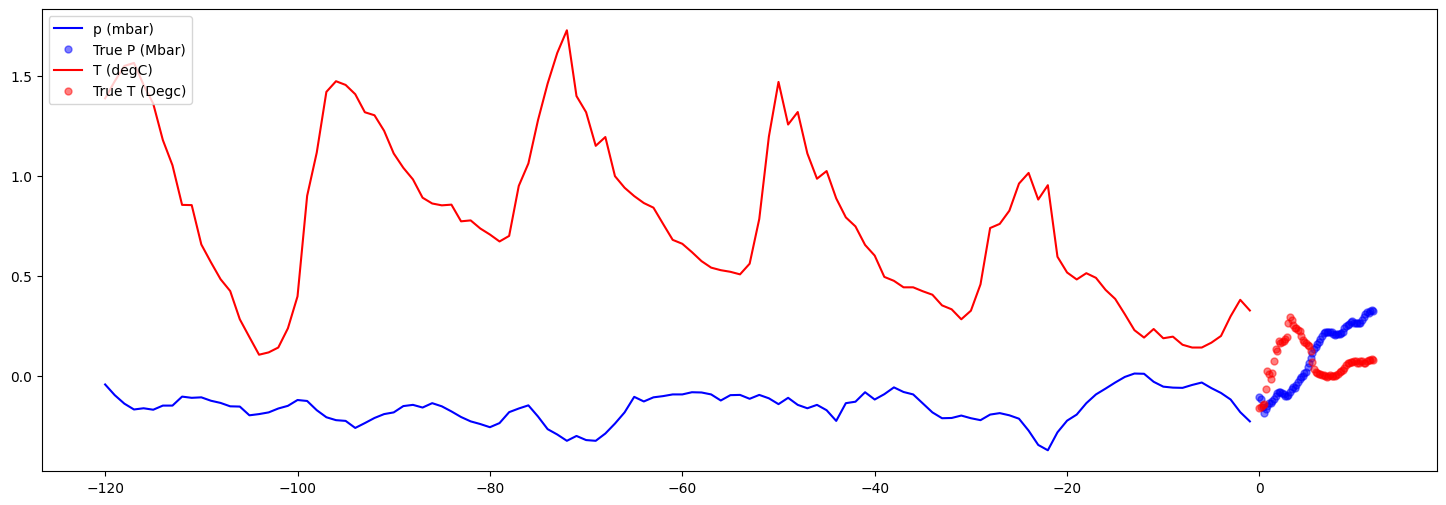

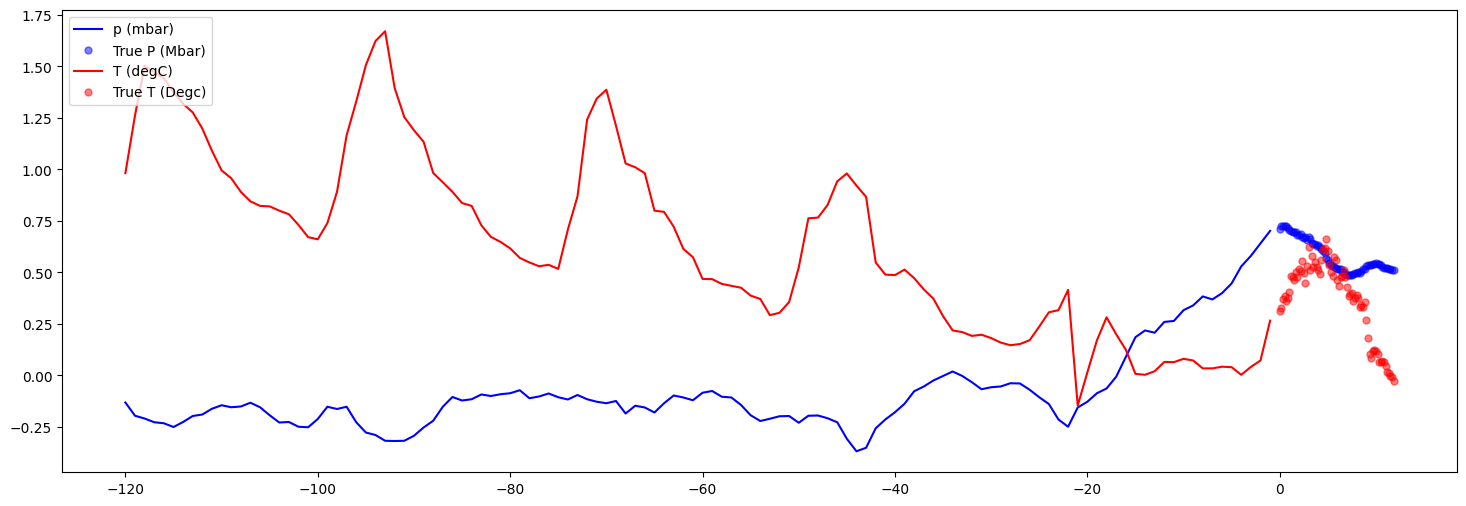

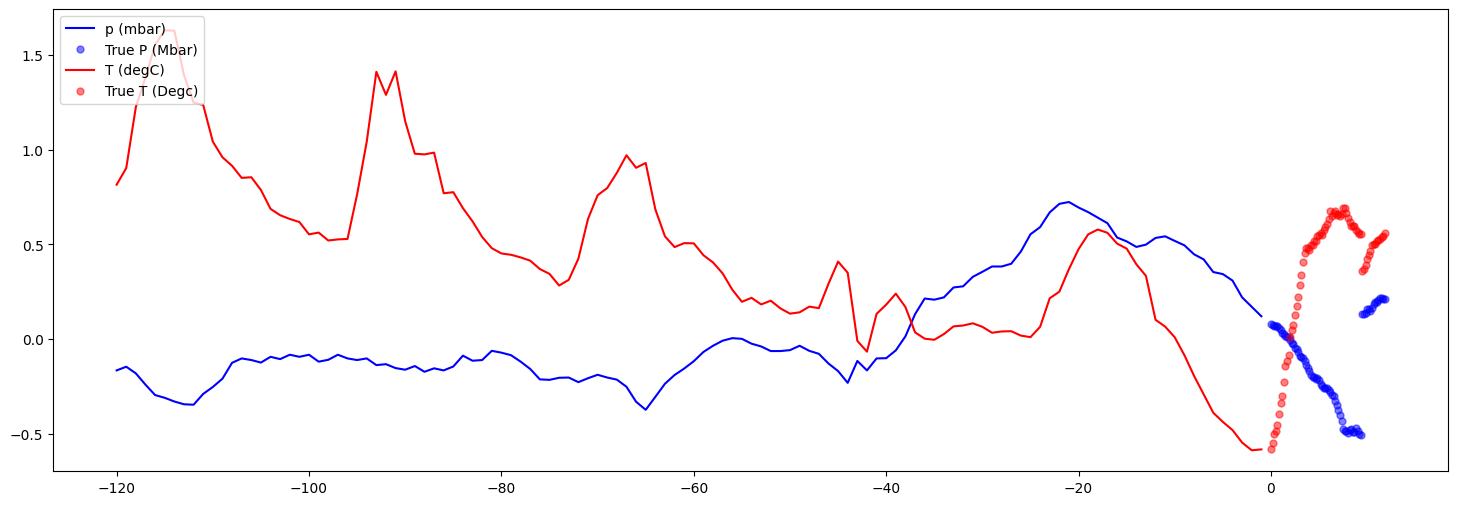

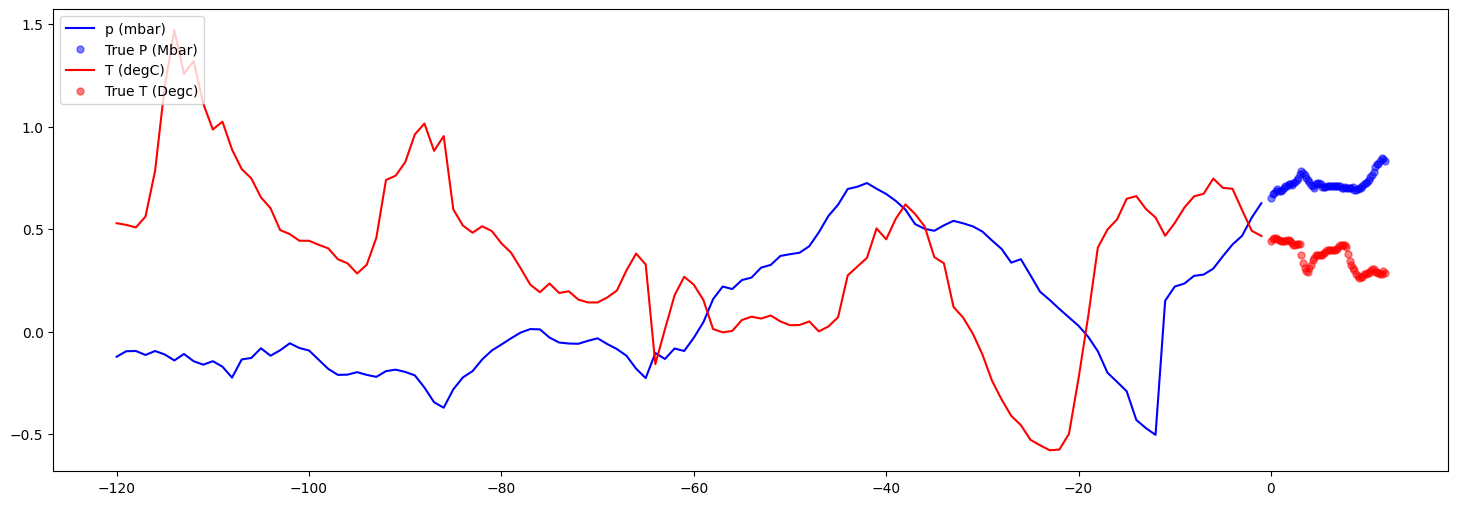

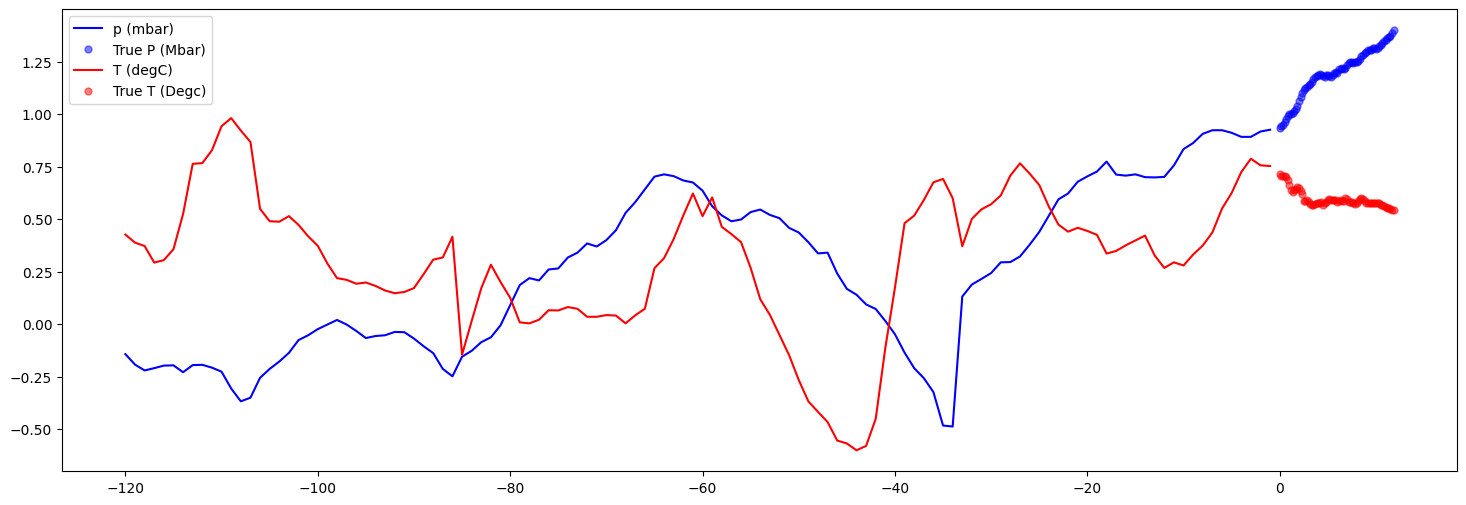

In [37]:
def visualize_multi_step_outputs(val_data, num_samples=10):
    """
    Visualize multi-step output predictions for a given validation dataset.

    Parameters:
        val_data (tf.data.Dataset): Validation data as a tf.data.Dataset.
        num_samples (int): Number of samples to visualize.

    Returns:
        None
    """
    for x, y in val_data.take(num_samples):
        multi_step_output_plot(np.squeeze(x[0]), np.squeeze(y[0]), np.array([0]))

In [47]:
notebookstart= time.time()

# Build model for the multi-step / multi-output prediction

def build_model(input_timesteps, output_timesteps, num_links, num_inputs):
    # Define the input layer
    input_layer = Input(shape=(input_timesteps, num_inputs, 1, 1), name='input_layer')

    # BatchNormalization layer
    x = BatchNormalization(name='batch_norm_0')(input_layer)

    # First LSTM layer with 64 units and return sequences
    x = LSTM(units=64, return_sequences=True, name='lstm_1')(x)
    x = Dropout(0.30, name='dropout_1')(x)  # Dropout layer
    x = BatchNormalization(name='batch_norm_1')(x)  # BatchNormalization layer

    # Second LSTM layer with 64 units
    x = LSTM(units=64, return_sequences=False, name='lstm_2')(x)
    x = Dropout(0.20, name='dropout_2')(x)  # Dropout layer
    x = BatchNormalization(name='batch_norm_2')(x)  # BatchNormalization layer

    # Flatten the output and repeat it for the specified number of output timesteps
    x = Flatten()(x)
    x = RepeatVector(output_timesteps)(x)
    x = Reshape((output_timesteps, num_inputs, 1, 64))(x)

    # Third LSTM layer with 64 units and return sequences
    x = LSTM(units=64, return_sequences=True, name='lstm_3')(x)
    x = Dropout(0.20, name='dropout_3')(x)  # Dropout layer
    x = BatchNormalization(name='batch_norm_3')(x)  # BatchNormalization layer

    # Fourth LSTM layer with 64 units and return sequences
    x = LSTM(units=64, return_sequences=True, name='lstm_4')(x)

    # TimeDistributed Dense layer with 1 unit and ReLU activation
    x = TimeDistributed(Dense(units=1, activation='relu', name='dense_1'))(x)

    # Output Dense layer with 1 unit and linear activation
    x = Dense(units=1, activation='linear', name='dense_2')(x)

    # Create the model
    model = Model(inputs=input_layer, outputs=x)

    # Define the optimizer (RMSprop) with a learning rate and clipvalue
    optimizer = tf.keras.optimizers.RMSprop(lr=0.004, clipvalue=1.0)

    # Compile the model with mean squared error (MSE) loss and specified metrics
    model.compile(loss="mse", optimizer=optimizer, metrics=['mae', 'mse'])

    return model

Tensorflow Version: 2.13.0
Pandas Version: 1.5.3
Numpy Version: 1.23.5
System Version: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [48]:
# For refernce from orignal tutorial

def build_model_example(input_timesteps, output_timesteps, num_links, num_inputs):
    model = Sequential()
    model.add(BatchNormalization(name = 'batch_norm_0', input_shape = (input_timesteps, num_inputs, 1, 1)))
    model.add(ConvLSTM2D(name ='conv_lstm_1',
                         filters = 64, kernel_size = (10, 1),
                         padding = 'same',
                         return_sequences = False))

    model.add(Dropout(0.30, name = 'dropout_1'))
    model.add(BatchNormalization(name = 'batch_norm_1'))

    model.add(Flatten())
    model.add(RepeatVector(output_timesteps))
    model.add(Reshape((output_timesteps, num_inputs, 1, 64)))

    model.add(ConvLSTM2D(name ='conv_lstm_4',
                         filters = 64, kernel_size = (5, 1),
                         padding='same',
                         return_sequences = True))

    model.add(TimeDistributed(Dense(units=1, name = 'dense_1', activation = 'relu')))
    model.add(Dense(units=1, name = 'dense_2'))
    optimizer = tf.keras.optimizers.RMSprop(lr=0.003, clipvalue=1.0)
    model.compile(loss = "mse", optimizer = optimizer, metrics = ['mae', 'mse'])
    return model

In [49]:
# Extend Prediction Window..
future_target = 144
x_train_multi, y_train_multi = multivariate_multioutput_data(dataset[:,:2], dataset[:,:2], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_multioutput_data(dataset[:,:2], dataset[:, :2],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

BATCH_SIZE = 128

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [50]:
# Model Training

# Configure the early stopping
modelstart = time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience = PATIENCE, restore_best_weights=True)
# Select the model and input data sets
model = build_model(x_train_multi.shape[1], future_target, y_train_multi.shape[2], x_train_multi.shape[2])
# print model being used for confirmation
print(model.summary())

# Train the model
print("\nTRAIN MODEL...")
history = model.fit(train_data_multi,
                    epochs = 30,
                    validation_data=val_data_multi,
                    steps_per_epoch=350,
                    validation_steps=500,
                    verbose=1,
                    callbacks=[early_stopping])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_norm_0 (BatchNormali  (None, 120, 2, 1, 1)      4         
 zation)                                                         
                                                                 
 conv_lstm_1 (ConvLSTM2D)    (None, 2, 1, 64)          166656    
                                                                 
 dropout_1 (Dropout)         (None, 2, 1, 64)          0         
                                                                 
 batch_norm_1 (BatchNormali  (None, 2, 1, 64)          256       
 zation)                                                         
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVecto  (None, 144, 128)         

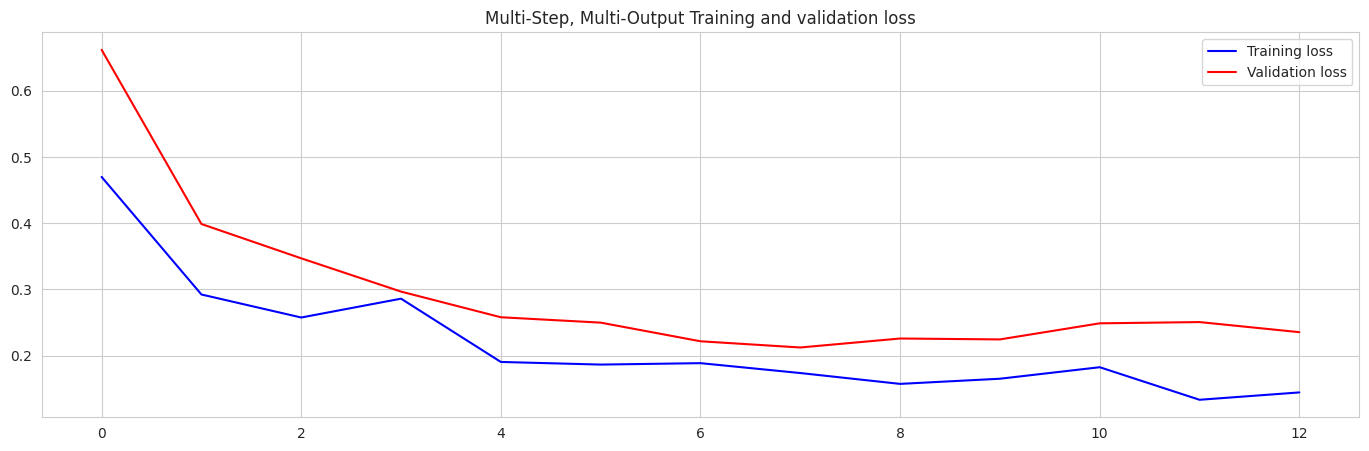

In [51]:
# Using Plotting Function to visualise the loss
plot_train_history(history, 'Multi-Step, Multi-Output Training and validation loss')

1/1 [==============================] - 1s 1s/step


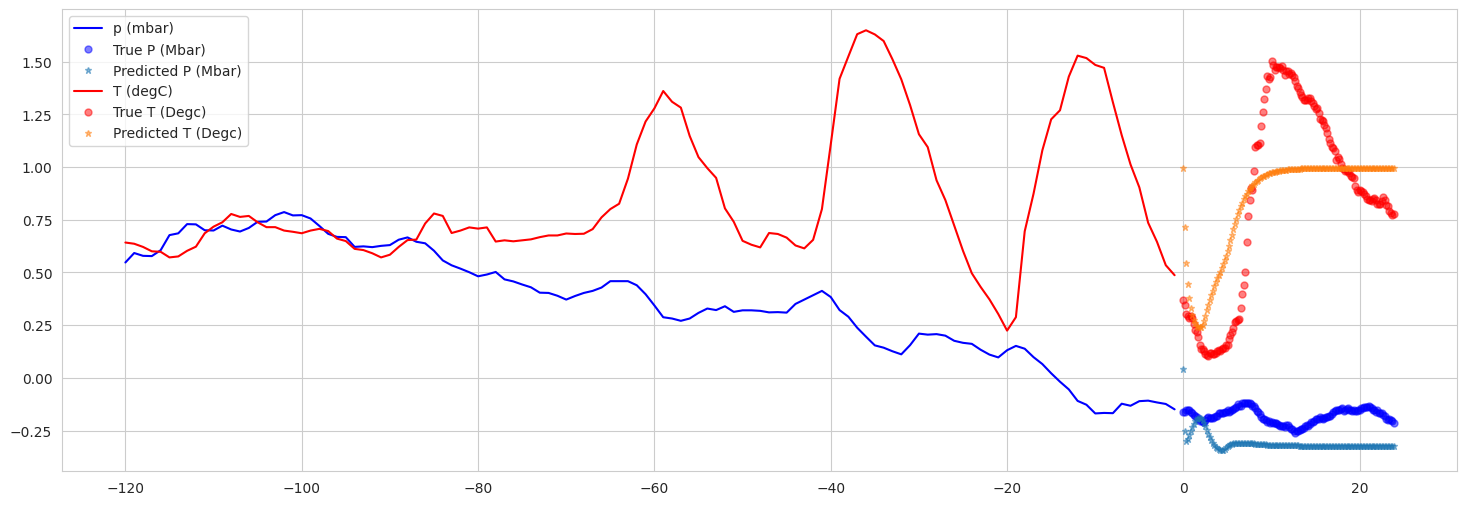

1/1 [==============================] - 0s 93ms/step


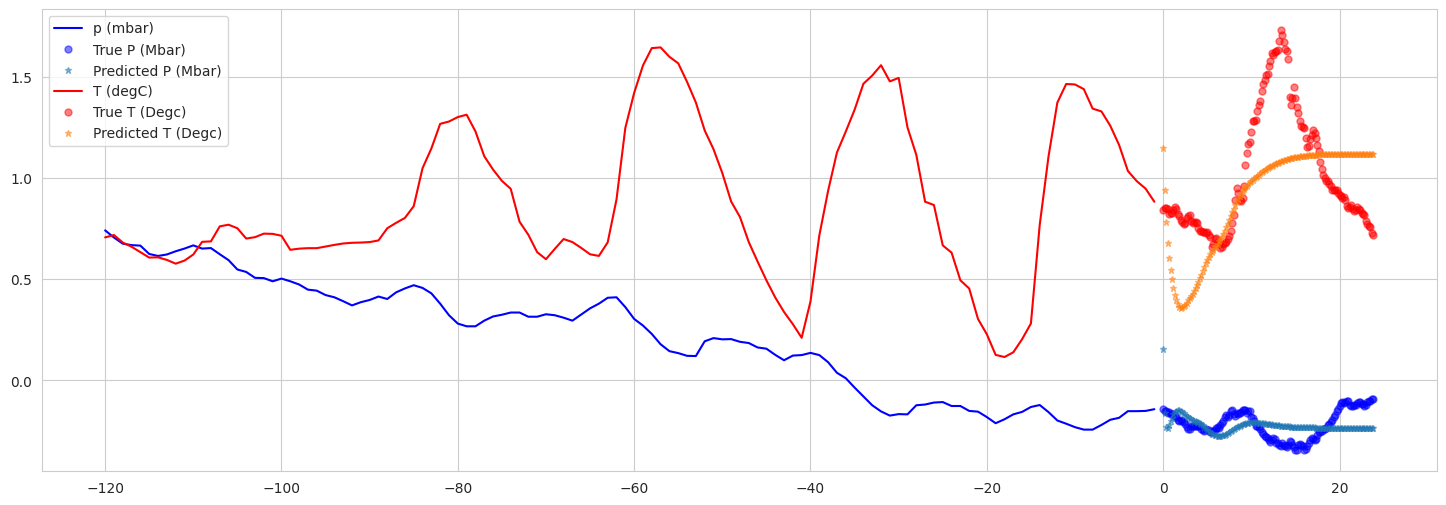

1/1 [==============================] - 0s 146ms/step


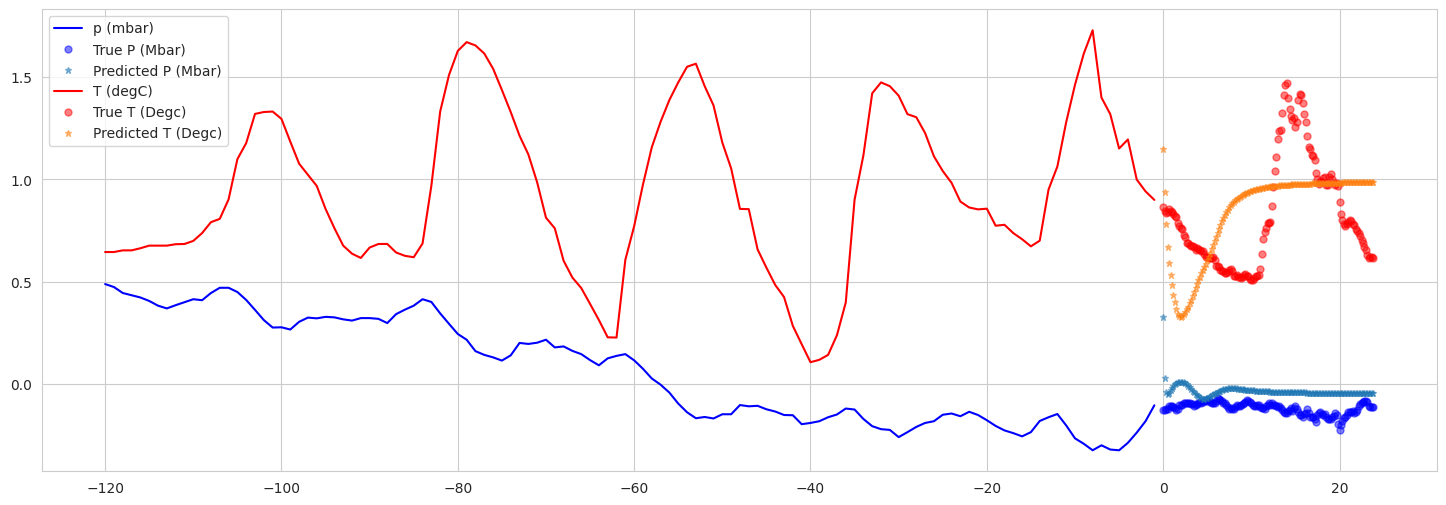

1/1 [==============================] - 0s 149ms/step


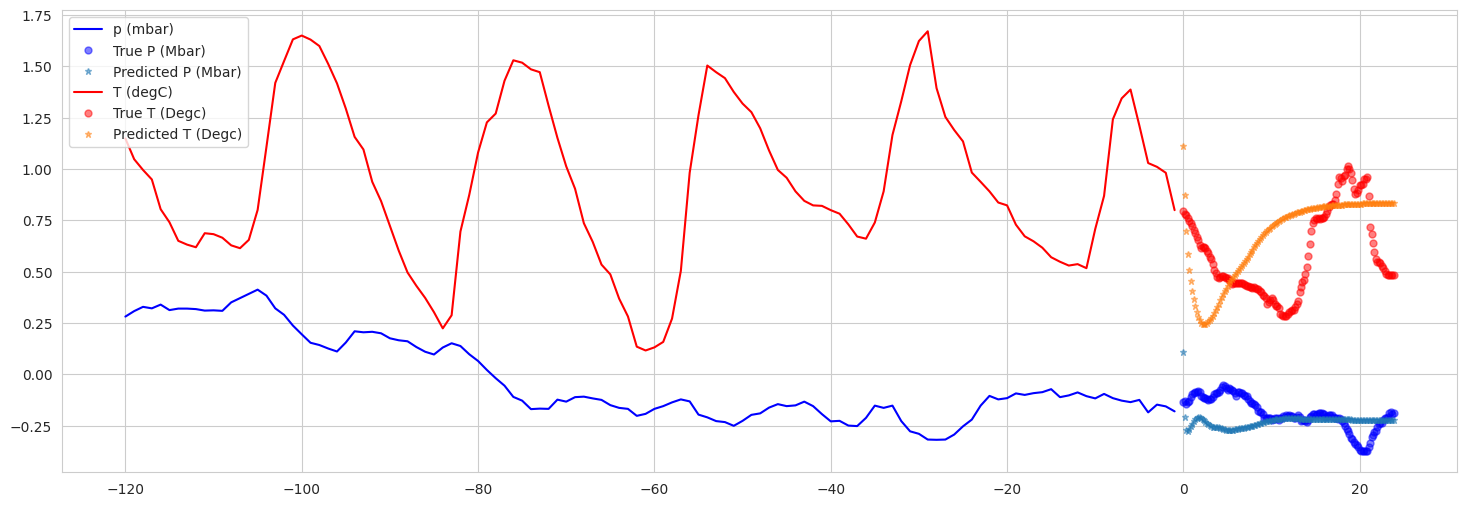

1/1 [==============================] - 0s 142ms/step


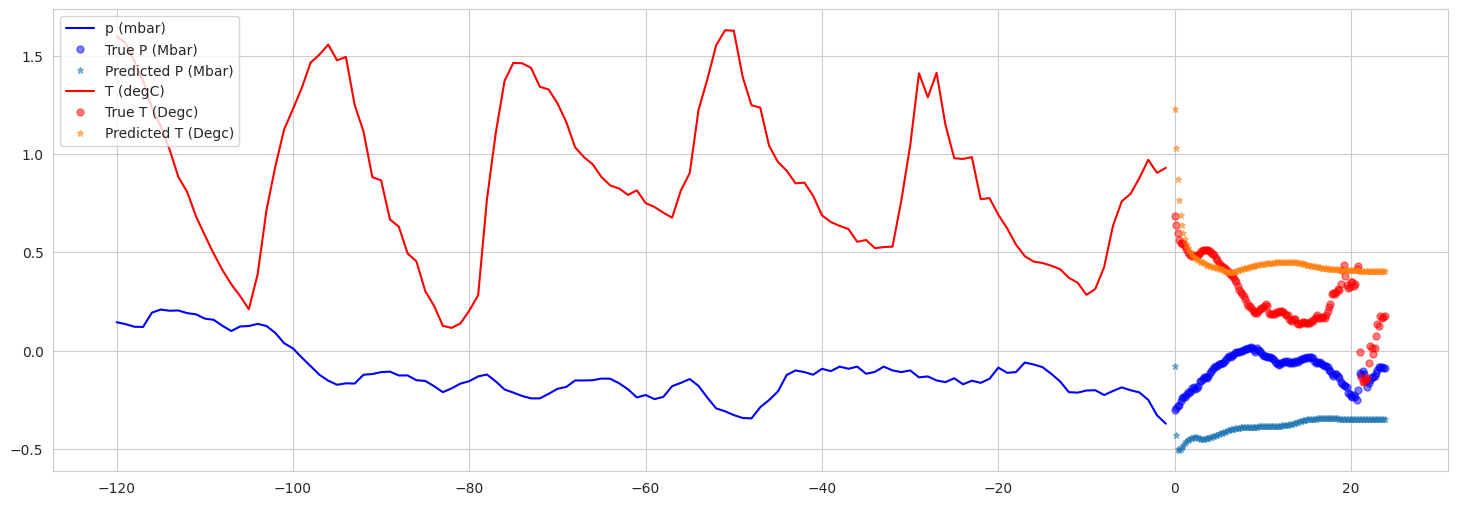

1/1 [==============================] - 0s 150ms/step


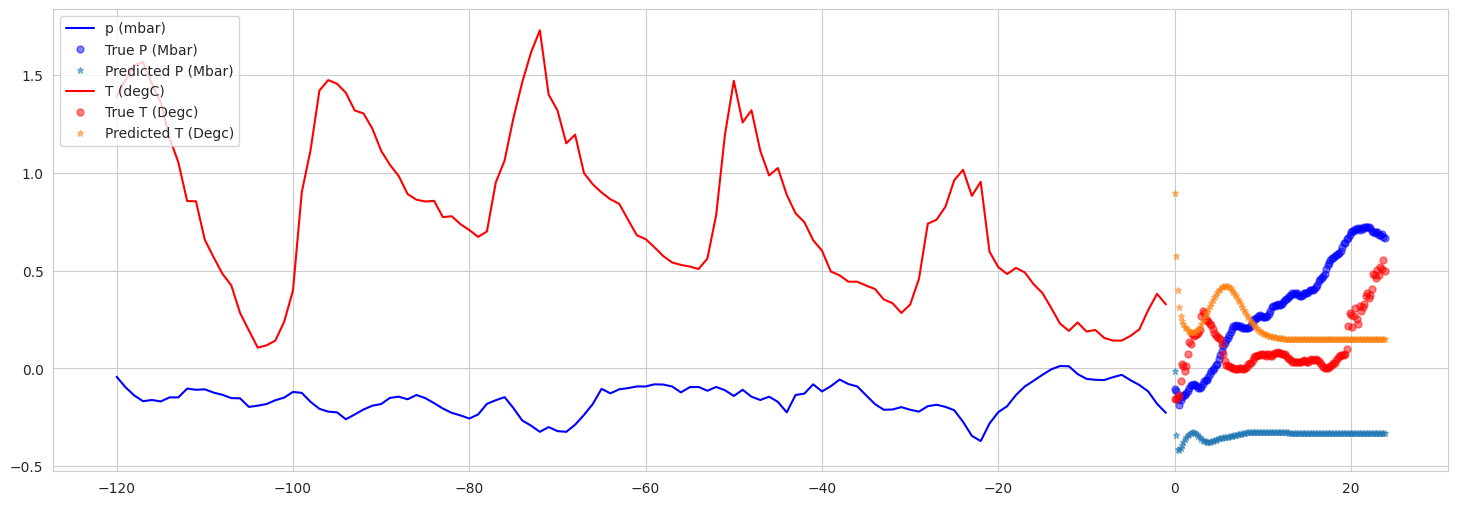

1/1 [==============================] - 0s 135ms/step


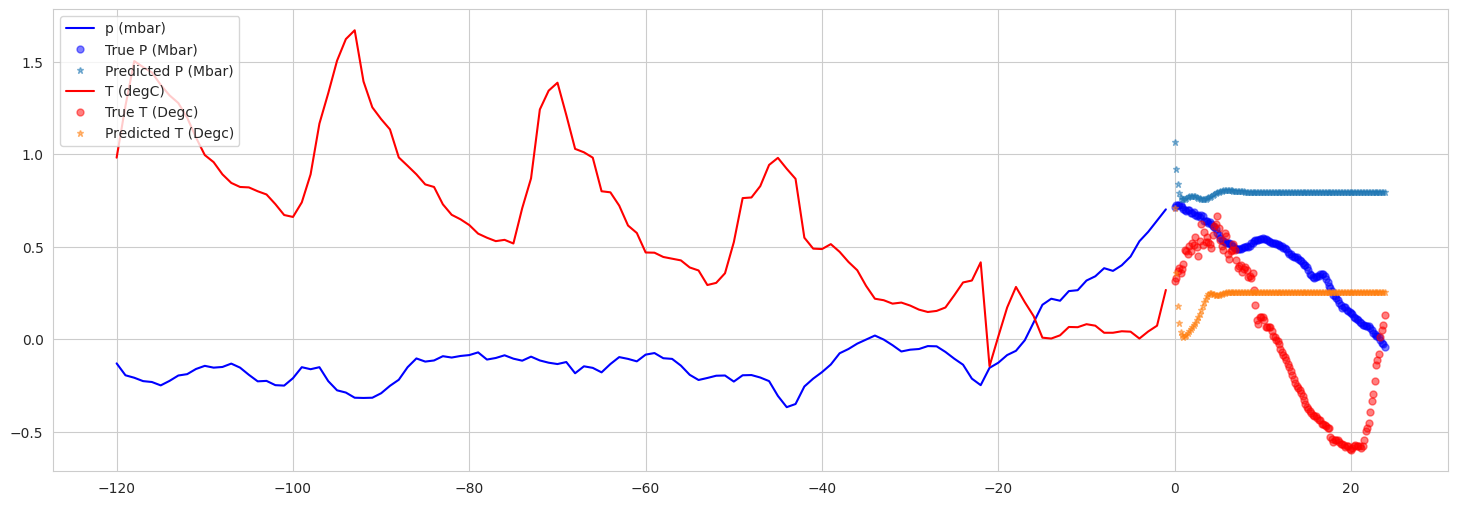

1/1 [==============================] - 0s 137ms/step


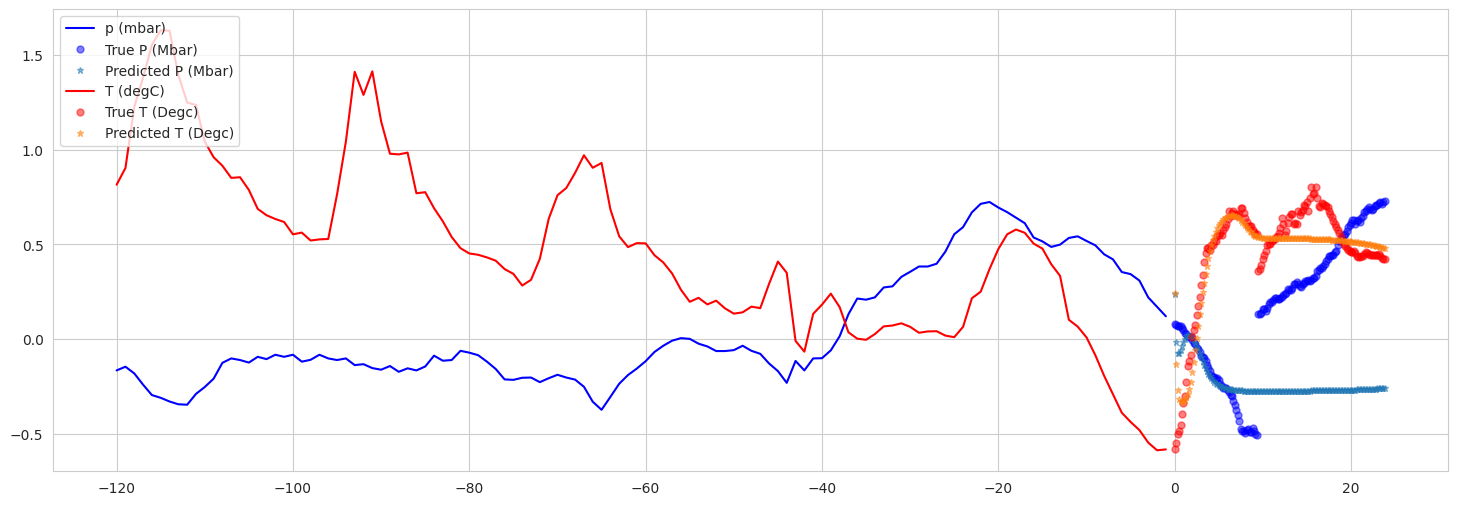

1/1 [==============================] - 0s 145ms/step


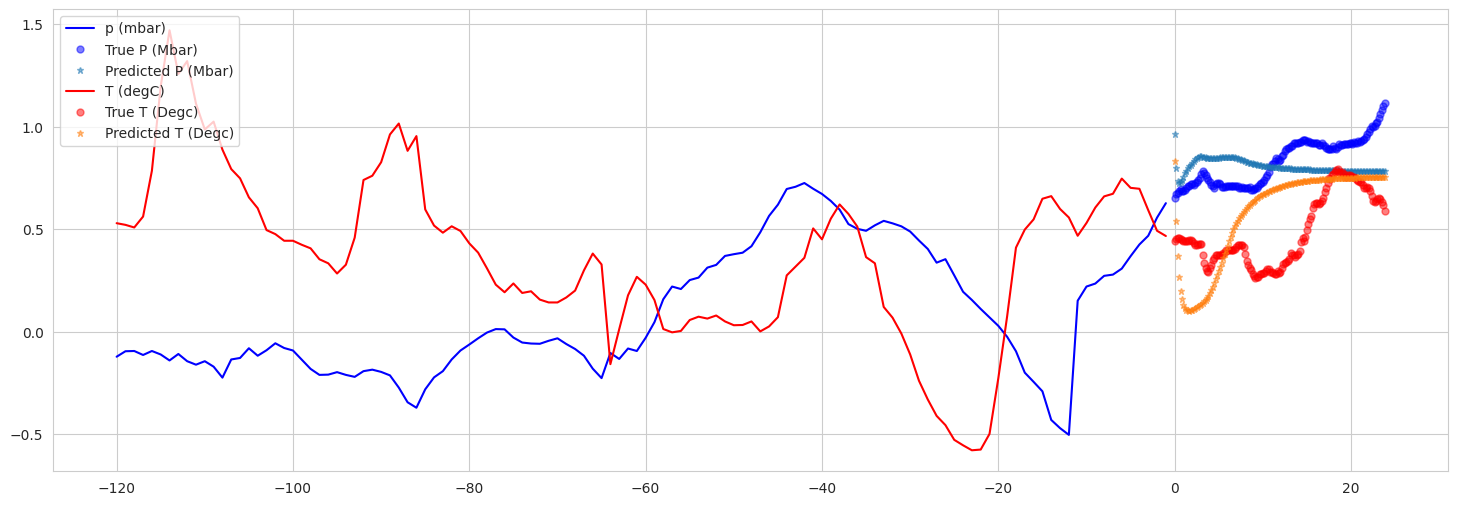

1/1 [==============================] - 0s 144ms/step


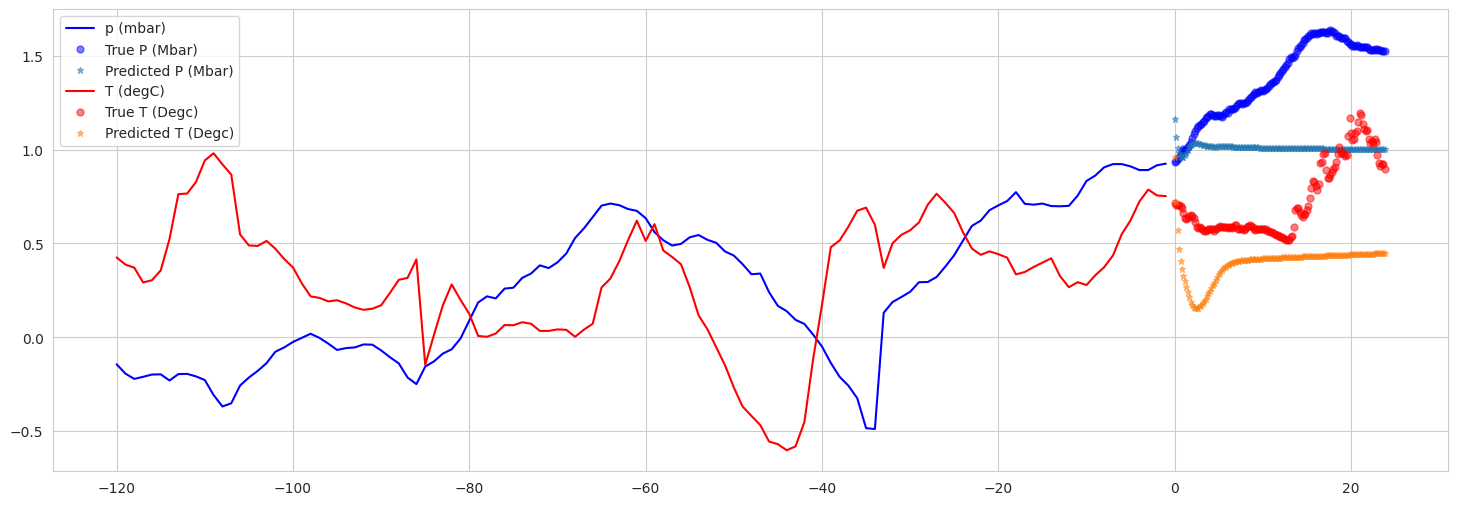

In [52]:
def visualize_multi_step_outputs(model, val_data, num_samples=10):
    """
    Visualize multi-step output predictions for a given model and validation dataset.

    Parameters:
        model (tf.keras.Model): The model for making predictions.
        val_data (tf.data.Dataset): Validation data as a tf.data.Dataset.
        num_samples (int): Number of samples to visualize.

    Returns:
        None
    """
    for x, y in val_data.take(num_samples):
        prediction = model.predict(x[0][np.newaxis,:,:,:,:])
        multi_step_output_plot(np.squeeze(x[0]), np.squeeze(y[0]), np.squeeze(prediction))

visualize_multi_step_outputs(model, val_data_multi, num_samples=10)


Evaluation in Final Report

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu

In [ ]:
!jupyter nbconvert --to HTML /content/Prototype_1a.ipynb

[NbConvertApp] Converting notebook /content/Prototype_1a.ipynb to HTML
[NbConvertApp] Writing 1733911 bytes to /content/Prototype_1a.html
